In [0]:
import glob
from PIL import Image
import numpy as np

import os
import cv2
from tqdm.notebook import tqdm

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten ,Dropout,LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import TensorBoard,ModelCheckpoint,EarlyStopping
from tensorflow import keras
from keras import layers

from keras.models import Model
import tensorflow as tf
from sklearn.model_selection import train_test_split

%matplotlib inline
from keras.applications import VGG16

Using TensorFlow backend.


In [0]:
# 헤어 카테고리가 담긴 리스트
categories = ['baby_perm','bob_cut','buzz_cut','c_curl_perm','chuffy_bang','chuffy_bang','crop_cut'
             ,'dandy_cut','dreadlocks','hime_cut','hippie_perm','hush_cut','layered_cut','mohican'
             ,'mushroom_cut','part_perm','pixie_cut','pomade','shaggy_cut','spinswallow_perm','under_cut'
             ,'wave_perm','wolf_cut']

In [0]:
for i in tqdm(categories):
    path = glob.glob('./hair_final/{}'.format(i))
    print(path)

['./hair_final/baby_perm']
['./hair_final/bob_cut']
['./hair_final/buzz_cut']
['./hair_final/c_curl_perm']
['./hair_final/chuffy_bang']
['./hair_final/chuffy_bang']
['./hair_final/crop_cut']
['./hair_final/dandy_cut']
['./hair_final/dreadlocks']
['./hair_final/hime_cut']
['./hair_final/hippie_perm']
['./hair_final/hush_cut']
['./hair_final/layered_cut']
['./hair_final/mohican']
['./hair_final/mushroom_cut']
['./hair_final/part_perm']
['./hair_final/pixie_cut']
['./hair_final/pomade']
['./hair_final/shaggy_cut']
['./hair_final/spinswallow_perm']
['./hair_final/under_cut']
['./hair_final/wave_perm']
['./hair_final/wolf_cut']



In [0]:
for i in tqdm(categories):
    path = glob.glob('./hair_final/{}'.format(i))
    # 우선 os 모듈의 listdir을 사용해 특정 폴더에 있는 파일을 가져와 줍니다.
    print('path:',path)
    file_list = os.listdir(*path)
    file_list_png = [file for file in file_list if file.endswith(('.png','.jpg'))]
    print(file_list_png)
    
    # 저장경로 설정
    save_path = "./hair_final_folders/{}".format(i)
    print(save_path)
    save_path2 = save_path + "/"
    print(save_path2)
    
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
        print('없는카테고리폴더생성완료')
        
    print('수정된경로',path)
    
    for file_list in file_list_png:
        print(file_list)
        image_path = path[0] + '/' + file_list
        img =cv2.imread(image_path)
#         img =cv2.resize(img,(224,224),3)
        
        # height,weight를 resize해줍니다. 
        
        # 이미지를 축소할때 주로 사용하는 영역보간법 cv2.INTER_AREA 를 사용했습니다.
        dst = cv2.resize(img, dsize =(224,224),interpolation=cv2.INTER_AREA)
        cv2.imwrite(save_path2 + file_list, dst)

path: ['./hair_final/baby_perm']
['google_베이비펌 picuki.com_0004.jpg', 'google_베이비펌 picuki.com_0012.jpg', 'google_베이비펌 picuki.com_0019.jpg', 'google_베이비펌 picuki.com_0021.jpg', 'google_베이비펌 picuki.com_0024.jpg', 'google_베이비펌 picuki.com_0026.jpg', 'google_베이비펌 picuki.com_0028.jpg', 'google_베이비펌 picuki.com_0029.jpg', 'google_베이비펌 picuki.com_0030.jpg', 'google_베이비펌 picuki.com_0037.jpg', 'google_베이비펌 picuki.com_0043.jpg', 'google_베이비펌 picuki.com_0044.jpg', 'google_베이비펌 picuki.com_0046.jpg', 'google_베이비펌 picuki.com_0047.jpg', 'google_베이비펌 picuki.com_0048.jpg', 'google_베이비펌 picuki.com_0052.jpg', 'google_베이비펌 picuki.com_0056.jpg', 'google_베이비펌 picuki.com_0066.jpg', 'google_베이비펌 picuki.com_0071.jpg', 'google_베이비펌 picuki.com_0074.jpg', 'google_베이비펌 picuki.com_0102.jpg', 'google_베이비펌 picuki.com_0108.jpg', 'google_베이비펌 picuki.com_0111.jpg', 'google_베이비펌 picuki.com_0112.jpg', 'google_베이비펌 picuki.com_0119.jpg', 'google_베이비펌 picuki.com_0121.jpg', 'google_베이비펌 picuki.com_0136.jpg', 'google_베이비펌 picuki.c

google_베이비펌 연예인_0064.jpg
google_베이비펌 연예인_0079.jpg
google_베이비펌 연예인_0102.jpg
google_베이비펌 연예인_0111.jpg
google_베이비펌 연예인_0113.jpg
google_베이비펌 연예인_0118.jpg
google_베이비펌 연예인_0122.jpg
google_베이비펌 연예인_0126.jpg
google_베이비펌 연예인_0132.jpg
google_베이비펌 연예인_0147.jpg
google_베이비펌 연예인_0211.jpg
google_베이비펌 연예인_0217.jpg
google_베이비펌 연예인_0243.jpg
google_베이비펌 연예인_0298.jpg
google_베이비펌 연예인_0327.jpg
google_베이비펌 연예인_0405.jpg
google_베이비펌 연예인_0525.jpg
google_베이비펌 연예인_0533.jpg
google_베이비펌 연예인_0542.jpg
google_베이비펌 연예인_0560.jpg
google_베이비펌 연예인_0568.jpg
google_베이비펌 연예인_0583.jpg
google_베이비펌 연예인_0590.jpg
google_베이비펌 연예인_0594.jpg
google_베이비펌 연예인_0601.jpg
google_베이비펌 연예인_0603.jpg
google_베이비펌 연예인_0688.jpg
google_베이비펌 연예인_0689.jpg
google_베이비펌 연예인_0696.jpg
google_베이비펌 연예인_0698.jpg
google_베이비펌 연예인_0707.jpg
google_베이비펌 연예인_0714.jpg
google_베이비펌_0001.jpg
google_베이비펌_0002.jpg
google_베이비펌_0004.jpg
google_베이비펌_0015.jpg
google_베이비펌_0016.jpg
google_베이비펌_0017.jpg
google_베이비펌_0019.jpg
google_베이비펌_0020.jpg
google_베이비펌_0023.jpg
google_베이비펌

naver_베이비펌_0068.jpg
naver_베이비펌_0069.jpg
naver_베이비펌_0074.jpg
naver_베이비펌_0075.jpg
naver_베이비펌_0076.jpg
naver_베이비펌_0082.jpg
naver_베이비펌_0083.jpg
naver_베이비펌_0085.jpg
naver_베이비펌_0088.jpg
naver_베이비펌_0089.jpg
naver_베이비펌_0093.jpg
naver_베이비펌_0095.jpg
naver_베이비펌_0096.jpg
naver_베이비펌_0104.jpg
naver_베이비펌_0105.jpg
naver_베이비펌_0111.jpg
naver_베이비펌_0112.jpg
naver_베이비펌_0114.jpg
naver_베이비펌_0115.jpg
naver_베이비펌_0117.jpg
naver_베이비펌_0118.jpg
naver_베이비펌_0121.jpg
naver_베이비펌_0122.jpg
naver_베이비펌_0126.jpg
naver_베이비펌_0127.jpg
naver_베이비펌_0128.jpg
naver_베이비펌_0130.jpg
naver_베이비펌_0131.jpg
naver_베이비펌_0132.jpg
naver_베이비펌_0142.jpg
naver_베이비펌_0144.jpg
naver_베이비펌_0151.jpg
naver_베이비펌_0152.jpg
naver_베이비펌_0155.jpg
naver_베이비펌_0156.jpg
naver_베이비펌_0162.jpg
naver_베이비펌_0163.jpg
naver_베이비펌_0171.jpg
naver_베이비펌_0172.jpg
naver_베이비펌_0176.jpg
naver_베이비펌_0177.jpg
naver_베이비펌_0178.jpg
naver_베이비펌_0180.jpg
naver_베이비펌_0181.jpg
naver_베이비펌_0183.jpg
naver_베이비펌_0185.jpg
naver_베이비펌_0194.jpg
naver_베이비펌_0195.jpg
naver_베이비펌_0196.jpg
naver_베이비펌_0197.jpg


google_보브컷 picuki.com_0348.jpg
google_보브컷 picuki.com_0350.jpg
google_보브컷 picuki.com_0355.jpg
google_보브컷 picuki.com_0356.jpg
google_보브컷 picuki.com_0382.jpg
google_보브컷 picuki.com_0386.jpg
google_보브컷 picuki.com_0387.jpg
google_보브컷 picuki.com_0388.jpg
google_보브컷 picuki.com_0391.jpg
google_보브컷 picuki.com_0393.jpg
google_보브컷 picuki.com_0395.jpg
google_보브컷 picuki.com_0403.jpg
google_보브컷 picuki.com_0404.jpg
google_보브컷 picuki.com_0405.jpg
google_보브컷 picuki.com_0412.jpg
google_보브컷 picuki.com_0432.jpg
google_보브컷 picuki.com_0457.jpg
google_보브컷 picuki.com_0471.jpg
google_보브컷 picuki.com_0472.jpg
google_보브컷 picuki.com_0481.jpg
google_보브컷 picuki.com_0488.jpg
google_보브컷 picuki.com_0490.jpg
google_보브컷 picuki.com_0491.jpg
google_보브컷 picuki.com_0494.jpg
google_보브컷 picuki.com_0496.jpg
google_보브컷 picuki.com_0497.jpg
google_보브컷 picuki.com_0512.jpg
google_보브컷 picuki.com_0515.jpg
google_보브컷 picuki.com_0528.jpg
google_보브컷 picuki.com_0534.jpg
google_보브컷 picuki.com_0541.jpg
google_보브컷 picuki.com_0544.jpg
google_보

google_보브컷_0163.jpg
google_보브컷_0164.jpg
google_보브컷_0165.jpg
google_보브컷_0166.jpg
google_보브컷_0169.jpg
google_보브컷_0170.jpg
google_보브컷_0173.jpg
google_보브컷_0179.jpg
google_보브컷_0182.jpg
google_보브컷_0188.jpg
google_보브컷_0197.jpg
google_보브컷_0201.jpg
google_보브컷_0202.png
google_보브컷_0204.jpg
google_보브컷_0205.jpg
google_보브컷_0208.jpg
google_보브컷_0210.jpg
google_보브컷_0212.jpg
google_보브컷_0223.jpg
google_보브컷_0227.jpg
google_보브컷_0231.jpg
google_보브컷_0233.jpg
google_보브컷_0238.jpg
google_보브컷_0245.jpg
google_보브컷_0251.jpg
google_보브컷_0261.jpg
google_보브컷_0267.jpg
google_보브컷_0271.jpg
google_보브컷_0279.jpg
google_보브컷_0289.jpg
google_보브컷_0299.jpg
google_보브컷_0301.jpg
google_보브컷_0302.jpg
google_보브컷_0306.jpg
google_보브컷_0314.jpg
google_보브컷_0316.jpg
google_보브컷_0320.jpg
google_보브컷_0324.jpg
google_보브컷_0329.jpg
google_보브컷_0337.jpg
google_보브컷_0342.jpg
google_보브컷_0346.jpg
google_보브컷_0350.jpg
google_보브컷_0352.jpg
google_보브컷_0354.jpg
google_보브컷_0358.jpg
google_보브컷_0359.jpg
google_보브컷_0364.jpg
google_보브컷_0367.jpg
google_보브컷_0374.jpg


naver_보브컷_0653.jpg
naver_보브컷_0654.jpg
naver_보브컷_0655.jpg
naver_보브컷_0659.jpg
naver_보브컷_0660.jpg
naver_보브컷_0665.jpg
naver_보브컷_0667.jpg
naver_보브컷_0668.jpg
naver_보브컷_0672.jpg
naver_보브컷_0673.jpg
naver_보브컷_0675.jpg
naver_보브컷_0677.jpg
naver_보브컷_0681.jpg
naver_보브컷_0685.jpg
naver_보브컷_0694.jpg
naver_보브컷_0697.jpg
naver_보브컷_0698.jpg
naver_보브컷_0728.jpg
naver_보브컷_0744.jpg
naver_보브컷_0751.jpg
naver_보브컷_0752.jpg
naver_보브컷_0762.jpg
naver_보브컷_0766.jpg
naver_보브컷_0767.jpg
naver_보브컷_0773.jpg
naver_보브컷_0784.jpg
naver_보브컷_0792.jpg
naver_보브컷_0806.jpg
naver_보브컷_0808.jpg
naver_보브컷_0817.jpg
naver_보브컷_0818.jpg
naver_보브컷_0823.jpg
naver_보브컷_0824.jpg
naver_보브컷_0829.jpg
naver_보브컷_0834.jpg
naver_보브컷_0840.jpg
naver_보브컷_0843.jpg
naver_보브컷_0845.jpg
naver_보브컷_0849.jpg
naver_보브컷_0851.jpg
naver_보브컷_0854.jpg
naver_보브컷_0855.jpg
naver_보브컷_0856.jpg
naver_보브컷_0860.jpg
naver_보브컷_0862.jpg
naver_보브컷_0863.jpg
naver_보브컷_0877.jpg
naver_보브컷_0880.jpg
naver_보브컷_0882.jpg
naver_보브컷_0889.jpg
naver_보브컷_0890.jpg
naver_보브컷_0891.jpg
naver_보브컷_08

없는카테고리폴더생성완료
수정된경로 ['./hair_final/buzz_cut']
google_버즈컷 picuki.com_0002.jpg
google_버즈컷 picuki.com_0004.jpg
google_버즈컷 picuki.com_0007.jpg
google_버즈컷 picuki.com_0009.jpg
google_버즈컷 picuki.com_0013.jpg
google_버즈컷 picuki.com_0025.jpg
google_버즈컷 picuki.com_0029.jpg
google_버즈컷 picuki.com_0031.jpg
google_버즈컷 picuki.com_0052.jpg
google_버즈컷 picuki.com_0054.jpg
google_버즈컷 picuki.com_0057.jpg
google_버즈컷 picuki.com_0067.jpg
google_버즈컷 picuki.com_0088.jpg
google_버즈컷 picuki.com_0155.jpg
google_버즈컷 picuki.com_0171.jpg
google_버즈컷 picuki.com_0205.jpg
google_버즈컷 picuki.com_0242.jpg
google_버즈컷 picuki.com_0295.jpg
google_버즈컷 picuki.com_0304.jpg
google_버즈컷 picuki.com_0329.jpg
google_버즈컷 picuki.com_0342.jpg
google_버즈컷 picuki.com_0355.jpg
google_버즈컷 picuki.com_0470.jpg
google_버즈컷 picuki.com_0521.jpg
google_버즈컷 picuki.com_0695.jpg
google_버즈컷 picuki.com_0699.jpg
google_버즈컷 picuki.com_0718.jpg
google_버즈컷 picuki.com_0742.jpg
google_버즈컷 picuki.com_0743.jpg
google_버즈컷 picuki.com_0756.jpg
google_버즈컷 picuki.com_077

google_C컬펌 picuki.com_0038.jpg
google_C컬펌 picuki.com_0039.jpg
google_C컬펌 picuki.com_0040.jpg
google_C컬펌 picuki.com_0041.jpg
google_C컬펌 picuki.com_0044.jpg
google_C컬펌 picuki.com_0053.jpg
google_C컬펌 picuki.com_0055.jpg
google_C컬펌 picuki.com_0056.jpg
google_C컬펌 picuki.com_0057.jpg
google_C컬펌 picuki.com_0059.jpg
google_C컬펌 picuki.com_0061.jpg
google_C컬펌 picuki.com_0063.jpg
google_C컬펌 picuki.com_0068.jpg
google_C컬펌 picuki.com_0069.jpg
google_C컬펌 picuki.com_0071.jpg
google_C컬펌 picuki.com_0076.jpg
google_C컬펌 picuki.com_0079.jpg
google_C컬펌 picuki.com_0081.jpg
google_C컬펌 picuki.com_0082.jpg
google_C컬펌 picuki.com_0086.jpg
google_C컬펌 picuki.com_0089.jpg
google_C컬펌 picuki.com_0093.jpg
google_C컬펌 picuki.com_0094.jpg
google_C컬펌 picuki.com_0095.jpg
google_C컬펌 picuki.com_0096.jpg
google_C컬펌 picuki.com_0098.jpg
google_C컬펌 picuki.com_0100.jpg
google_C컬펌 picuki.com_0101.jpg
google_C컬펌 picuki.com_0106.jpg
google_C컬펌 picuki.com_0111.jpg
google_C컬펌 picuki.com_0117.jpg
google_C컬펌 picuki.com_0118.jpg
google_C

google_C컬펌 연예인_0188.jpg
google_C컬펌 연예인_0193.jpg
google_C컬펌 연예인_0196.jpg
google_C컬펌_0000.jpg
google_C컬펌_0001.jpg
google_C컬펌_0002.jpg
google_C컬펌_0004.jpg
google_C컬펌_0008.jpg
google_C컬펌_0010.jpg
google_C컬펌_0011.jpg
google_C컬펌_0012.jpg
google_C컬펌_0013.jpg
google_C컬펌_0014.jpg
google_C컬펌_0015.jpg
google_C컬펌_0017.jpg
google_C컬펌_0019.jpg
google_C컬펌_0020.jpg
google_C컬펌_0021.jpg
google_C컬펌_0022.jpg
google_C컬펌_0023.jpg
google_C컬펌_0024.jpg
google_C컬펌_0025.jpg
google_C컬펌_0026.png
google_C컬펌_0027.jpg
google_C컬펌_0029.jpg
google_C컬펌_0030.jpg
google_C컬펌_0031.jpg
google_C컬펌_0032.jpg
google_C컬펌_0033.jpg
google_C컬펌_0034.jpg
google_C컬펌_0035.jpg
google_C컬펌_0037.jpg
google_C컬펌_0042.jpg
google_C컬펌_0043.jpg
google_C컬펌_0044.jpg
google_C컬펌_0045.jpg
google_C컬펌_0046.jpg
google_C컬펌_0048.png
google_C컬펌_0049.jpg
google_C컬펌_0051.jpg
google_C컬펌_0052.jpg
google_C컬펌_0053.jpg
google_C컬펌_0054.jpg
google_C컬펌_0055.jpg
google_C컬펌_0057.jpg
google_C컬펌_0059.jpg
google_C컬펌_0060.jpg
google_C컬펌_0062.jpg
google_C컬펌_0064.jpg
google_C

naver_C컬펌 연예인_0467.jpg
naver_C컬펌 연예인_0486.jpg
naver_C컬펌 연예인_0493.jpg
naver_C컬펌 연예인_0496.jpg
naver_C컬펌 연예인_0508.jpg
naver_C컬펌 연예인_0516.jpg
naver_C컬펌 연예인_0533.jpg
naver_C컬펌 연예인_0534.jpg
naver_C컬펌 연예인_0536.jpg
naver_C컬펌 연예인_0540.jpg
naver_C컬펌 연예인_0548.jpg
naver_C컬펌 연예인_0554.jpg
naver_C컬펌 연예인_0558.jpg
naver_C컬펌 연예인_0559.jpg
naver_C컬펌 연예인_0572.jpg
naver_C컬펌 연예인_0573.jpg
naver_C컬펌 연예인_0574.jpg
naver_C컬펌 연예인_0577.jpg
naver_C컬펌 연예인_0578.jpg
naver_C컬펌 연예인_0582.jpg
naver_C컬펌 연예인_0585.jpg
naver_C컬펌 연예인_0591.jpg
naver_C컬펌 연예인_0595.jpg
naver_C컬펌 연예인_0597.jpg
naver_C컬펌 연예인_0608.jpg
naver_C컬펌 연예인_0610.jpg
naver_C컬펌 연예인_0625.jpg
naver_C컬펌 연예인_0626.jpg
naver_C컬펌 연예인_0632.jpg
naver_C컬펌 연예인_0637.jpg
naver_C컬펌 연예인_0642.jpg
naver_C컬펌 연예인_0646.jpg
naver_C컬펌 연예인_0647.jpg
naver_C컬펌 연예인_0651.jpg
naver_C컬펌 연예인_0652.jpg
naver_C컬펌 연예인_0656.jpg
naver_C컬펌 연예인_0657.jpg
naver_C컬펌 연예인_0658.jpg
naver_C컬펌 연예인_0669.jpg
naver_C컬펌 연예인_0672.jpg
naver_C컬펌 연예인_0674.jpg
naver_C컬펌 연예인_0676.jpg
naver_C컬펌 연예인_0683.jpg
naver_C컬펌 연

naver_C컬펌_0360.jpg
naver_C컬펌_0361.jpg
naver_C컬펌_0362.jpg
naver_C컬펌_0363.jpg
naver_C컬펌_0364.jpg
naver_C컬펌_0365.jpg
naver_C컬펌_0366.jpg
naver_C컬펌_0367.jpg
naver_C컬펌_0368.jpg
naver_C컬펌_0370.jpg
naver_C컬펌_0371.jpg
naver_C컬펌_0374.jpg
naver_C컬펌_0375.jpg
naver_C컬펌_0376.jpg
naver_C컬펌_0377.jpg
naver_C컬펌_0378.jpg
naver_C컬펌_0379.jpg
naver_C컬펌_0380.jpg
naver_C컬펌_0381.jpg
naver_C컬펌_0382.jpg
naver_C컬펌_0383.jpg
naver_C컬펌_0384.jpg
naver_C컬펌_0386.jpg
naver_C컬펌_0387.jpg
naver_C컬펌_0388.jpg
naver_C컬펌_0389.jpg
naver_C컬펌_0390.jpg
naver_C컬펌_0391.jpg
naver_C컬펌_0393.jpg
naver_C컬펌_0394.jpg
naver_C컬펌_0395.jpg
naver_C컬펌_0396.jpg
naver_C컬펌_0397.jpg
naver_C컬펌_0398.jpg
naver_C컬펌_0399.jpg
naver_C컬펌_0400.jpg
naver_C컬펌_0401.jpg
naver_C컬펌_0402.jpg
naver_C컬펌_0403.jpg
naver_C컬펌_0404.jpg
naver_C컬펌_0405.jpg
naver_C컬펌_0406.jpg
naver_C컬펌_0407.jpg
naver_C컬펌_0408.jpg
naver_C컬펌_0409.jpg
naver_C컬펌_0411.jpg
naver_C컬펌_0412.jpg
naver_C컬펌_0413.jpg
naver_C컬펌_0414.jpg
naver_C컬펌_0415.jpg
naver_C컬펌_0417.jpg
naver_C컬펌_0418.jpg
naver_C컬펌_04

naver_C컬펌_0886.jpg
naver_C컬펌_0887.jpg
naver_C컬펌_0889.jpg
naver_C컬펌_0890.jpg
naver_C컬펌_0891.jpg
naver_C컬펌_0893.jpg
naver_C컬펌_0894.jpg
naver_C컬펌_0895.jpg
naver_C컬펌_0896.jpg
naver_C컬펌_0897.jpg
naver_C컬펌_0898.jpg
naver_C컬펌_0899.jpg
naver_C컬펌_0900.jpg
naver_C컬펌_0902.jpg
naver_C컬펌_0903.jpg
naver_C컬펌_0904.jpg
naver_C컬펌_0905.jpg
naver_C컬펌_0906.jpg
naver_C컬펌_0908.jpg
naver_C컬펌_0909.jpg
naver_C컬펌_0910.jpg
naver_C컬펌_0911.jpg
naver_C컬펌_0912.jpg
naver_C컬펌_0913.jpg
naver_C컬펌_0914.jpg
naver_C컬펌_0915.jpg
naver_C컬펌_0916.jpg
naver_C컬펌_0917.jpg
naver_C컬펌_0918.jpg
naver_C컬펌_0919.jpg
naver_C컬펌_0921.jpg
naver_C컬펌_0922.jpg
naver_C컬펌_0923.jpg
naver_C컬펌_0925.jpg
naver_C컬펌_0926.jpg
naver_C컬펌_0927.jpg
naver_C컬펌_0928.jpg
naver_C컬펌_0929.jpg
naver_C컬펌_0932.jpg
naver_C컬펌_0933.jpg
naver_C컬펌_0935.jpg
naver_C컬펌_0936.jpg
naver_C컬펌_0937.jpg
naver_C컬펌_0938.jpg
naver_C컬펌_0939.jpg
naver_C컬펌_0940.jpg
naver_C컬펌_0941.jpg
naver_C컬펌_0942.jpg
naver_C컬펌_0943.jpg
naver_C컬펌_0944.jpg
naver_C컬펌_0945.jpg
naver_C컬펌_0946.jpg
naver_C컬펌_09

google_처피뱅 picuki.com_0281.jpg
google_처피뱅 picuki.com_0285.jpg
google_처피뱅 picuki.com_0311.jpg
google_처피뱅 picuki.com_0330.jpg
google_처피뱅 picuki.com_0332.jpg
google_처피뱅 picuki.com_0334.jpg
google_처피뱅 picuki.com_0345.jpg
google_처피뱅 picuki.com_0346.jpg
google_처피뱅 picuki.com_0349.jpg
google_처피뱅 picuki.com_0351.jpg
google_처피뱅 picuki.com_0352.jpg
google_처피뱅 picuki.com_0366.jpg
google_처피뱅 picuki.com_0448.jpg
google_처피뱅 picuki.com_0461.jpg
google_처피뱅 picuki.com_0462.jpg
google_처피뱅 picuki.com_0463.jpg
google_처피뱅 picuki.com_0470.jpg
google_처피뱅 picuki.com_0494.jpg
google_처피뱅 picuki.com_0499.jpg
google_처피뱅 picuki.com_0500.jpg
google_처피뱅 picuki.com_0503.jpg
google_처피뱅 picuki.com_0504.jpg
google_처피뱅 picuki.com_0632.jpg
google_처피뱅 picuki.com_0635.jpg
google_처피뱅 picuki.com_0686.jpg
google_처피뱅 picuki.com_0792.jpg
google_처피뱅 picuki.com_0796.jpg
google_처피뱅 연예인 picuki.com_0047.jpg
google_처피뱅 연예인 picuki.com_0091.jpg
google_처피뱅 연예인 picuki.com_0127.jpg
google_처피뱅 연예인 picuki.com_0151.jpg
google_처피뱅 연예인 picuki.c

naver_처피뱅 연예인_0206.jpg
naver_처피뱅 연예인_0207.jpg
naver_처피뱅 연예인_0210.jpg
naver_처피뱅 연예인_0211.jpg
naver_처피뱅 연예인_0219.jpg
naver_처피뱅 연예인_0223.jpg
naver_처피뱅 연예인_0225.jpg
naver_처피뱅 연예인_0227.jpg
naver_처피뱅 연예인_0228.jpg
naver_처피뱅 연예인_0229.jpg
naver_처피뱅 연예인_0230.jpg
naver_처피뱅 연예인_0231.jpg
naver_처피뱅 연예인_0234.jpg
naver_처피뱅 연예인_0235.jpg
naver_처피뱅 연예인_0236.jpg
naver_처피뱅 연예인_0237.jpg
naver_처피뱅 연예인_0239.jpg
naver_처피뱅 연예인_0240.jpg
naver_처피뱅 연예인_0242.jpg
naver_처피뱅 연예인_0245.jpg
naver_처피뱅 연예인_0246.jpg
naver_처피뱅 연예인_0252.jpg
naver_처피뱅 연예인_0254.jpg
naver_처피뱅 연예인_0256.jpg
naver_처피뱅 연예인_0258.jpg
naver_처피뱅 연예인_0262.jpg
naver_처피뱅 연예인_0266.jpg
naver_처피뱅 연예인_0267.jpg
naver_처피뱅 연예인_0271.jpg
naver_처피뱅 연예인_0272.jpg
naver_처피뱅 연예인_0279.jpg
naver_처피뱅 연예인_0281.jpg
naver_처피뱅 연예인_0282.jpg
naver_처피뱅 연예인_0286.jpg
naver_처피뱅 연예인_0290.jpg
naver_처피뱅 연예인_0303.jpg
naver_처피뱅 연예인_0312.jpg
naver_처피뱅 연예인_0314.jpg
naver_처피뱅 연예인_0315.jpg
naver_처피뱅 연예인_0318.jpg
naver_처피뱅 연예인_0319.jpg
naver_처피뱅 연예인_0320.jpg
naver_처피뱅 연예인_0323.jpg
naver_처피뱅 연

google_처피뱅 picuki.com_0462.jpg
google_처피뱅 picuki.com_0463.jpg
google_처피뱅 picuki.com_0470.jpg
google_처피뱅 picuki.com_0494.jpg
google_처피뱅 picuki.com_0499.jpg
google_처피뱅 picuki.com_0500.jpg
google_처피뱅 picuki.com_0503.jpg
google_처피뱅 picuki.com_0504.jpg
google_처피뱅 picuki.com_0632.jpg
google_처피뱅 picuki.com_0635.jpg
google_처피뱅 picuki.com_0686.jpg
google_처피뱅 picuki.com_0792.jpg
google_처피뱅 picuki.com_0796.jpg
google_처피뱅 연예인 picuki.com_0047.jpg
google_처피뱅 연예인 picuki.com_0091.jpg
google_처피뱅 연예인 picuki.com_0127.jpg
google_처피뱅 연예인 picuki.com_0151.jpg
google_처피뱅 연예인 picuki.com_0158.jpg
google_처피뱅 연예인 picuki.com_0168.jpg
google_처피뱅 연예인 picuki.com_0185.jpg
google_처피뱅 연예인 picuki.com_0204.jpg
google_처피뱅 연예인 picuki.com_0230.jpg
google_처피뱅 연예인 picuki.com_0267.jpg
google_처피뱅 연예인 picuki.com_0303.jpg
google_처피뱅 연예인 picuki.com_0308.jpg
google_처피뱅 연예인 picuki.com_0323.jpg
google_처피뱅 연예인 picuki.com_0324.jpg
google_처피뱅 연예인 picuki.com_0329.jpg
google_처피뱅 연예인 picuki.com_0343.jpg
google_처피뱅 연예인 picuki.com_0344.jpg
go

naver_처피뱅 연예인_0290.jpg
naver_처피뱅 연예인_0303.jpg
naver_처피뱅 연예인_0312.jpg
naver_처피뱅 연예인_0314.jpg
naver_처피뱅 연예인_0315.jpg
naver_처피뱅 연예인_0318.jpg
naver_처피뱅 연예인_0319.jpg
naver_처피뱅 연예인_0320.jpg
naver_처피뱅 연예인_0323.jpg
naver_처피뱅 연예인_0333.jpg
naver_처피뱅 연예인_0341.jpg
naver_처피뱅 연예인_0348.jpg
naver_처피뱅 연예인_0350.jpg
naver_처피뱅 연예인_0353.jpg
naver_처피뱅 연예인_0356.jpg
naver_처피뱅 연예인_0359.jpg
naver_처피뱅 연예인_0360.jpg
naver_처피뱅 연예인_0361.jpg
naver_처피뱅 연예인_0365.jpg
naver_처피뱅 연예인_0372.jpg
naver_처피뱅 연예인_0384.jpg
naver_처피뱅 연예인_0391.jpg
naver_처피뱅 연예인_0395.jpg
naver_처피뱅 연예인_0396.jpg
naver_처피뱅 연예인_0397.jpg
naver_처피뱅 연예인_0399.jpg
naver_처피뱅 연예인_0403.jpg
naver_처피뱅 연예인_0404.jpg
naver_처피뱅 연예인_0405.jpg
naver_처피뱅 연예인_0408.jpg
naver_처피뱅 연예인_0409.jpg
naver_처피뱅 연예인_0413.jpg
naver_처피뱅 연예인_0415.jpg
naver_처피뱅 연예인_0419.jpg
naver_처피뱅 연예인_0421.jpg
naver_처피뱅 연예인_0427.jpg
naver_처피뱅 연예인_0433.jpg
naver_처피뱅 연예인_0438.jpg
naver_처피뱅 연예인_0439.jpg
naver_처피뱅 연예인_0442.jpg
naver_처피뱅 연예인_0449.jpg
naver_처피뱅 연예인_0450.jpg
naver_처피뱅 연예인_0451.jpg
naver_처피뱅 연

google_크롭컷 picuki.com_0246.jpg
google_크롭컷 picuki.com_0248.jpg
google_크롭컷 picuki.com_0250.jpg
google_크롭컷 picuki.com_0253.jpg
google_크롭컷 picuki.com_0254.jpg
google_크롭컷 picuki.com_0255.jpg
google_크롭컷 picuki.com_0257.jpg
google_크롭컷 picuki.com_0280.jpg
google_크롭컷 picuki.com_0282.jpg
google_크롭컷 picuki.com_0284.jpg
google_크롭컷 picuki.com_0289.jpg
google_크롭컷 picuki.com_0293.jpg
google_크롭컷 picuki.com_0297.jpg
google_크롭컷 picuki.com_0300.jpg
google_크롭컷 picuki.com_0303.jpg
google_크롭컷 picuki.com_0306.jpg
google_크롭컷 picuki.com_0311.jpg
google_크롭컷 picuki.com_0312.jpg
google_크롭컷 picuki.com_0314.jpg
google_크롭컷 picuki.com_0321.jpg
google_크롭컷 picuki.com_0323.jpg
google_크롭컷 picuki.com_0326.jpg
google_크롭컷 picuki.com_0333.jpg
google_크롭컷 picuki.com_0337.jpg
google_크롭컷 picuki.com_0345.jpg
google_크롭컷 picuki.com_0346.jpg
google_크롭컷 picuki.com_0349.jpg
google_크롭컷 picuki.com_0359.jpg
google_크롭컷 picuki.com_0370.jpg
google_크롭컷 picuki.com_0375.jpg
google_크롭컷 picuki.com_0376.jpg
google_크롭컷 picuki.com_0383.jpg
google_크

naver_크롭컷 연예인_0188.jpg
naver_크롭컷 연예인_0203.jpg
naver_크롭컷 연예인_0207.jpg
naver_크롭컷 연예인_0212.jpg
naver_크롭컷 연예인_0216.jpg
naver_크롭컷 연예인_0221.jpg
naver_크롭컷 연예인_0222.jpg
naver_크롭컷 연예인_0226.jpg
naver_크롭컷 연예인_0228.jpg
naver_크롭컷 연예인_0229.jpg
naver_크롭컷 연예인_0230.jpg
naver_크롭컷 연예인_0250.jpg
naver_크롭컷 연예인_0253.jpg
naver_크롭컷 연예인_0255.jpg
naver_크롭컷 연예인_0269.jpg
naver_크롭컷 연예인_0282.jpg
naver_크롭컷 연예인_0287.jpg
naver_크롭컷 연예인_0293.jpg
naver_크롭컷 연예인_0295.jpg
naver_크롭컷 연예인_0296.jpg
naver_크롭컷 연예인_0303.jpg
naver_크롭컷 연예인_0313.jpg
naver_크롭컷 연예인_0323.jpg
naver_크롭컷 연예인_0324.jpg
naver_크롭컷 연예인_0329.jpg
naver_크롭컷 연예인_0332.jpg
naver_크롭컷 연예인_0333.jpg
naver_크롭컷 연예인_0335.jpg
naver_크롭컷 연예인_0350.jpg
naver_크롭컷 연예인_0353.jpg
naver_크롭컷 연예인_0354.png
naver_크롭컷 연예인_0367.jpg
naver_크롭컷 연예인_0368.jpg
naver_크롭컷 연예인_0374.jpg
naver_크롭컷 연예인_0380.jpg
naver_크롭컷 연예인_0381.jpg
naver_크롭컷 연예인_0382.jpg
naver_크롭컷 연예인_0394.jpg
naver_크롭컷 연예인_0402.jpg
naver_크롭컷 연예인_0410.jpg
naver_크롭컷 연예인_0415.jpg
naver_크롭컷 연예인_0423.jpg
naver_크롭컷 연예인_0424.jpg
naver_크롭컷 연

naver_크롭컷_0560.jpg
naver_크롭컷_0561.jpg
naver_크롭컷_0565.jpg
naver_크롭컷_0566.jpg
naver_크롭컷_0568.jpg
naver_크롭컷_0570.jpg
naver_크롭컷_0573.jpg
naver_크롭컷_0576.jpg
naver_크롭컷_0581.jpg
naver_크롭컷_0583.jpg
naver_크롭컷_0584.jpg
naver_크롭컷_0585.jpg
naver_크롭컷_0587.jpg
naver_크롭컷_0588.jpg
naver_크롭컷_0591.jpg
naver_크롭컷_0592.jpg
naver_크롭컷_0593.jpg
naver_크롭컷_0598.jpg
naver_크롭컷_0604.jpg
naver_크롭컷_0607.jpg
naver_크롭컷_0611.jpg
naver_크롭컷_0613.jpg
naver_크롭컷_0616.jpg
naver_크롭컷_0617.jpg
naver_크롭컷_0618.jpg
naver_크롭컷_0622.jpg
naver_크롭컷_0624.jpg
naver_크롭컷_0625.jpg
naver_크롭컷_0633.jpg
naver_크롭컷_0637.jpg
naver_크롭컷_0638.jpg
naver_크롭컷_0640.jpg
naver_크롭컷_0641.jpg
naver_크롭컷_0644.jpg
naver_크롭컷_0646.jpg
naver_크롭컷_0647.jpg
naver_크롭컷_0650.jpg
naver_크롭컷_0653.jpg
naver_크롭컷_0654.jpg
naver_크롭컷_0655.jpg
naver_크롭컷_0657.jpg
naver_크롭컷_0659.jpg
naver_크롭컷_0661.jpg
naver_크롭컷_0662.jpg
naver_크롭컷_0664.jpg
naver_크롭컷_0665.jpg
naver_크롭컷_0666.jpg
naver_크롭컷_0667.jpg
naver_크롭컷_0668.jpg
naver_크롭컷_0669.jpg
naver_크롭컷_0677.jpg
naver_크롭컷_0678.jpg
naver_크롭컷_06

google_댄디컷 연예인_0222.jpg
google_댄디컷 연예인_0225.jpg
google_댄디컷 연예인_0227.jpg
google_댄디컷 연예인_0234.jpg
google_댄디컷 연예인_0238.jpg
google_댄디컷 연예인_0255.jpg
google_댄디컷 연예인_0261.jpg
google_댄디컷 연예인_0263.jpg
google_댄디컷 연예인_0269.jpg
google_댄디컷 연예인_0274.jpg
google_댄디컷 연예인_0275.jpg
google_댄디컷 연예인_0278.jpg
google_댄디컷 연예인_0299.jpg
google_댄디컷 연예인_0301.jpg
google_댄디컷 연예인_0304.jpg
google_댄디컷 연예인_0309.jpg
google_댄디컷 연예인_0310.jpg
google_댄디컷 연예인_0322.jpg
google_댄디컷 연예인_0326.jpg
google_댄디컷 연예인_0337.jpg
google_댄디컷 연예인_0345.jpg
google_댄디컷 연예인_0354.jpg
google_댄디컷 연예인_0385.jpg
google_댄디컷 연예인_0421.jpg
google_댄디컷 연예인_0427.jpg
google_댄디컷 연예인_0436.jpg
google_댄디컷 연예인_0444.jpg
google_댄디컷 연예인_0449.jpg
google_댄디컷 연예인_0465.jpg
google_댄디컷 연예인_0467.jpg
google_댄디컷 연예인_0479.jpg
google_댄디컷_0000.jpg
google_댄디컷_0005.jpg
google_댄디컷_0006.jpg
google_댄디컷_0009.jpg
google_댄디컷_0010.jpg
google_댄디컷_0035.jpg
google_댄디컷_0036.png
google_댄디컷_0044.jpg
google_댄디컷_0045.jpg
google_댄디컷_0049.jpg
google_댄디컷_0053.jpg
google_댄디컷_0054.jpg
google_댄디컷_0058.

naver_댄디컷_0708.jpg
naver_댄디컷_0716.jpg
naver_댄디컷_0717.jpg
naver_댄디컷_0718.jpg
naver_댄디컷_0731.jpg
naver_댄디컷_0736.jpg
naver_댄디컷_0738.jpg
naver_댄디컷_0743.jpg
naver_댄디컷_0745.jpg
naver_댄디컷_0757.jpg
naver_댄디컷_0759.jpg
naver_댄디컷_0761.jpg
naver_댄디컷_0762.jpg
naver_댄디컷_0763.jpg
naver_댄디컷_0764.jpg
naver_댄디컷_0767.jpg
naver_댄디컷_0769.jpg
naver_댄디컷_0770.jpg
naver_댄디컷_0778.jpg
naver_댄디컷_0779.jpg
naver_댄디컷_0780.jpg
naver_댄디컷_0792.jpg
naver_댄디컷_0798.jpg
naver_댄디컷_0801.jpg
naver_댄디컷_0802.jpg
naver_댄디컷_0803.jpg
naver_댄디컷_0806.jpg
naver_댄디컷_0811.jpg
naver_댄디컷_0814.jpg
naver_댄디컷_0829.jpg
naver_댄디컷_0838.jpg
naver_댄디컷_0848.jpg
naver_댄디컷_0849.jpg
naver_댄디컷_0852.jpg
naver_댄디컷_0854.jpg
naver_댄디컷_0856.jpg
naver_댄디컷_0858.jpg
naver_댄디컷_0860.jpg
naver_댄디컷_0862.jpg
naver_댄디컷_0881.jpg
naver_댄디컷_0883.jpg
naver_댄디컷_0885.jpg
naver_댄디컷_0886.jpg
naver_댄디컷_0894.jpg
naver_댄디컷_0895.jpg
naver_댄디컷_0903.jpg
naver_댄디컷_0909.jpg
naver_댄디컷_0926.jpg
naver_댄디컷_0934.jpg
naver_댄디컷_0938.jpg
naver_댄디컷_0939.jpg
naver_댄디컷_0940.jpg
naver_댄디컷_09

없는카테고리폴더생성완료
수정된경로 ['./hair_final/dreadlocks']
daum_드레드락_0000.jpg
daum_드레드락_0005.jpg
daum_드레드락_0009.jpg
daum_드레드락_0010.jpg
daum_드레드락_0014.jpg
daum_드레드락_0022.jpg
daum_드레드락_0027.jpg
daum_드레드락_0028.jpg
daum_드레드락_0031.jpg
daum_드레드락_0032.jpg
daum_드레드락_0035.jpg
daum_드레드락_0040.jpg
daum_드레드락_0042.jpg
daum_드레드락_0043.jpg
daum_드레드락_0050.jpg
daum_드레드락_0053.jpg
daum_드레드락_0055.jpg
daum_드레드락_0056.jpg
daum_드레드락_0057.jpg
daum_드레드락_0064.jpg
daum_드레드락_0077.jpg
daum_드레드락_0080.jpg
daum_드레드락_0085.jpg
daum_드레드락_0090.jpg
daum_드레드락_0092.jpg
daum_드레드락_0097.jpg
daum_드레드락_0103.jpg
daum_드레드락_0104.jpg
daum_드레드락_0106.jpg
daum_드레드락_0109.jpg
daum_드레드락_0120.jpg
daum_드레드락_0121.jpg
daum_드레드락_0124.jpg
daum_드레드락_0126.jpg
daum_드레드락_0127.jpg
daum_드레드락_0129.jpg
daum_드레드락_0130.jpg
daum_드레드락_0133.jpg
daum_드레드락_0137.jpg
daum_드레드락_0139.jpg
daum_드레드락_0142.jpg
daum_드레드락_0152.jpg
daum_드레드락_0153.jpg
daum_드레드락_0155.jpg
daum_드레드락_0161.jpg
daum_드레드락_0165.jpg
daum_드레드락_0174.jpg
daum_드레드락_0176.jpg
daum_드레드락_0183.jpg
daum_드레드락_0206.jpg
dau

daum_드레드락_1918.jpg
daum_드레드락_1920.jpg
daum_드레드락_1924.jpg
daum_드레드락_1934.jpg
daum_드레드락_1945.jpg
daum_드레드락_1946.jpg
daum_드레드락_1949.jpg
daum_드레드락_1950.jpg
daum_드레드락_1953.jpg
daum_드레드락_1956.jpg
daum_드레드락_1959.jpg
daum_드레드락_1967.jpg
daum_드레드락_1976.jpg
daum_드레드락_1992.jpg
daum_드레드락_1994.jpg
daum_드레드락_1997.jpg
daum_드레드락_2004.jpg
daum_드레드락_2012.jpg
daum_드레드락_2021.jpg
daum_드레드락_2023.jpg
daum_드레드락_2026.jpg
daum_드레드락_2027.jpg
daum_드레드락_2032.jpg
daum_드레드락_2033.jpg
daum_드레드락_2041.jpg
daum_드레드락_2042.jpg
daum_드레드락_2046.jpg
daum_드레드락_2065.jpg
daum_드레드락_2067.jpg
daum_드레드락_2074.jpg
daum_드레드락_2077.jpg
daum_드레드락_2080.jpg
daum_드레드락_2089.jpg
daum_드레드락_2094.jpg
daum_드레드락_2095.jpg
daum_드레드락_2098.jpg
daum_드레드락_2102.jpg
daum_드레드락_2103.jpg
daum_드레드락_2114.jpg
daum_드레드락_2115.jpg
daum_드레드락_2119.jpg
daum_드레드락_2130.jpg
daum_드레드락_2132.jpg
daum_드레드락_2133.jpg
daum_드레드락_2146.png
daum_드레드락_2166.jpg
daum_드레드락_2173.jpg
daum_드레드락_2174.jpg
daum_드레드락_2185.jpg
daum_드레드락_2187.jpg
daum_드레드락_2191.jpg
daum_드레드락_2192.jpg
daum_드레드락_22

naver_드레드락 연예인_0210.jpg
naver_드레드락 연예인_0213.jpg
naver_드레드락 연예인_0215.jpg
naver_드레드락 연예인_0218.jpg
naver_드레드락 연예인_0240.jpg
naver_드레드락 연예인_0243.jpg
naver_드레드락 연예인_0246.jpg
naver_드레드락 연예인_0247.jpg
naver_드레드락 연예인_0248.jpg
naver_드레드락 연예인_0252.jpg
naver_드레드락 연예인_0288.jpg
naver_드레드락 연예인_0289.jpg
naver_드레드락 연예인_0290.jpg
naver_드레드락 연예인_0291.jpg
naver_드레드락 연예인_0292.jpg
naver_드레드락_0002.jpg
naver_드레드락 연예인_0293.jpg
naver_드레드락 연예인_0294.jpg
naver_드레드락 연예인_0295.jpg
naver_드레드락 연예인_0329.jpg
naver_드레드락 연예인_0332.jpg
naver_드레드락 연예인_0336.jpg
naver_드레드락 연예인_0337.jpg
naver_드레드락 연예인_0338.jpg
naver_드레드락 연예인_0339.jpg
naver_드레드락 연예인_0340.jpg
naver_드레드락 연예인_0383.jpg
naver_드레드락 연예인_0384.jpg
naver_드레드락 연예인_0388.jpg
naver_드레드락 연예인_0397.jpg
naver_드레드락 연예인_0405.jpg
naver_드레드락 연예인_0411.jpg
naver_드레드락 연예인_0412.jpg
naver_드레드락 연예인_0419.jpg
naver_드레드락 연예인_0433.jpg
naver_드레드락 연예인_0434.jpg
naver_드레드락 연예인_0436.jpg
naver_드레드락 연예인_0449.jpg
naver_드레드락 연예인_0464.jpg
naver_드레드락 연예인_0507.jpg
naver_드레드락 연예인_0514.jpg
naver_드레드락 연예인_0538.

google_히메컷 picuki.com_0028.jpg
google_히메컷 picuki.com_0029.jpg
google_히메컷 picuki.com_0034.jpg
google_히메컷 picuki.com_0040.jpg
google_히메컷 picuki.com_0042.jpg
google_히메컷 picuki.com_0047.jpg
google_히메컷 picuki.com_0051.jpg
google_히메컷 picuki.com_0052.jpg
google_히메컷 picuki.com_0053.jpg
google_히메컷 picuki.com_0055.jpg
google_히메컷 picuki.com_0056.jpg
google_히메컷 picuki.com_0057.jpg
google_히메컷 picuki.com_0058.jpg
google_히메컷 picuki.com_0070.jpg
google_히메컷 picuki.com_0071.jpg
google_히메컷 picuki.com_0074.jpg
google_히메컷 picuki.com_0076.jpg
google_히메컷 picuki.com_0077.jpg
google_히메컷 picuki.com_0078.jpg
google_히메컷 picuki.com_0079.jpg
google_히메컷 picuki.com_0082.jpg
google_히메컷 picuki.com_0083.jpg
google_히메컷 picuki.com_0085.jpg
google_히메컷 picuki.com_0090.jpg
google_히메컷 picuki.com_0093.jpg
google_히메컷 picuki.com_0094.jpg
google_히메컷 picuki.com_0095.jpg
google_히메컷 picuki.com_0096.jpg
google_히메컷 picuki.com_0099.jpg
google_히메컷 picuki.com_0100.jpg
google_히메컷 picuki.com_0102.jpg
google_히메컷 picuki.com_0103.jpg
google_히

google_히메컷 연예인 picuki.com_0515.jpg
google_히메컷 연예인 picuki.com_0516.jpg
google_히메컷 연예인 picuki.com_0520.jpg
google_히메컷 연예인 picuki.com_0522.jpg
google_히메컷 연예인 picuki.com_0523.jpg
google_히메컷 연예인 picuki.com_0532.jpg
google_히메컷 연예인 picuki.com_0534.jpg
google_히메컷 연예인 picuki.com_0541.jpg
google_히메컷 연예인 picuki.com_0551.jpg
google_히메컷 연예인 picuki.com_0558.jpg
google_히메컷 연예인 picuki.com_0563.jpg
google_히메컷 연예인 picuki.com_0564.jpg
google_히메컷 연예인 picuki.com_0565.jpg
google_히메컷 연예인 picuki.com_0567.jpg
google_히메컷 연예인 picuki.com_0571.jpg
google_히메컷 연예인 picuki.com_0572.jpg
google_히메컷 연예인 picuki.com_0573.jpg
google_히메컷 연예인 picuki.com_0575.jpg
google_히메컷 연예인 picuki.com_0577.jpg
google_히메컷 연예인 picuki.com_0581.jpg
google_히메컷 연예인 picuki.com_0588.jpg
google_히메컷 연예인 picuki.com_0590.jpg
google_히메컷 연예인 picuki.com_0601.jpg
google_히메컷 연예인 picuki.com_0635.jpg
google_히메컷 연예인 picuki.com_0652.jpg
google_히메컷 연예인 picuki.com_0657.jpg
google_히메컷 연예인 picuki.com_0660.jpg
google_히메컷 연예인 picuki.com_0664.jpg
google_히메컷 연예인 picuk

google_히메컷_0270.jpg
google_히메컷_0271.jpg
google_히메컷_0272.jpg
google_히메컷_0274.jpg
google_히메컷_0275.jpg
google_히메컷_0281.jpg
google_히메컷_0282.jpg
google_히메컷_0283.jpg
google_히메컷_0285.jpg
google_히메컷_0289.jpg
google_히메컷_0297.jpg
google_히메컷_0306.jpg
google_히메컷_0313.jpg
google_히메컷_0316.jpg
google_히메컷_0327.jpg
google_히메컷_0335.jpg
google_히메컷_0337.jpg
google_히메컷_0338.jpg
google_히메컷_0340.jpg
google_히메컷_0341.jpg
google_히메컷_0343.jpg
google_히메컷_0344.jpg
google_히메컷_0348.jpg
google_히메컷_0350.jpg
google_히메컷_0351.jpg
google_히메컷_0353.jpg
google_히메컷_0354.jpg
google_히메컷_0355.jpg
google_히메컷_0356.jpg
google_히메컷_0357.jpg
google_히메컷_0363.jpg
google_히메컷_0366.jpg
google_히메컷_0368.jpg
google_히메컷_0370.jpg
google_히메컷_0371.jpg
google_히메컷_0376.jpg
google_히메컷_0377.jpg
google_히메컷_0379.jpg
google_히메컷_0380.jpg
google_히메컷_0382.jpg
google_히메컷_0383.jpg
google_히메컷_0385.jpg
google_히메컷_0386.jpg
google_히메컷_0389.jpg
google_히메컷_0390.jpg
google_히메컷_0391.jpg
google_히메컷_0393.jpg
google_히메컷_0394.jpg
google_히메컷_0397.jpg
google_히메컷_0398.jpg


naver_히메컷_0284.jpg
naver_히메컷_0285.jpg
naver_히메컷_0286.jpg
naver_히메컷_0289.jpg
naver_히메컷_0290.jpg
naver_히메컷_0291.jpg
naver_히메컷_0292.jpg
naver_히메컷_0293.jpg
naver_히메컷_0294.jpg
naver_히메컷_0295.jpg
naver_히메컷_0296.jpg
naver_히메컷_0297.jpg
naver_히메컷_0298.jpg
naver_히메컷_0300.jpg
naver_히메컷_0301.jpg
naver_히메컷_0302.jpg
naver_히메컷_0303.jpg
naver_히메컷_0304.jpg
naver_히메컷_0305.jpg
naver_히메컷_0306.jpg
naver_히메컷_0307.jpg
naver_히메컷_0308.jpg
naver_히메컷_0309.jpg
naver_히메컷_0311.jpg
naver_히메컷_0312.jpg
naver_히메컷_0315.jpg
naver_히메컷_0317.jpg
naver_히메컷_0320.jpg
naver_히메컷_0321.jpg
naver_히메컷_0322.jpg
naver_히메컷_0325.jpg
naver_히메컷_0326.jpg
naver_히메컷_0328.jpg
naver_히메컷_0329.jpg
naver_히메컷_0330.jpg
naver_히메컷_0331.jpg
naver_히메컷_0332.jpg
naver_히메컷_0333.jpg
naver_히메컷_0334.jpg
naver_히메컷_0335.jpg
naver_히메컷_0337.jpg
naver_히메컷_0338.jpg
naver_히메컷_0339.jpg
naver_히메컷_0340.jpg
naver_히메컷_0341.jpg
naver_히메컷_0342.jpg
naver_히메컷_0343.jpg
naver_히메컷_0345.jpg
naver_히메컷_0346.jpg
naver_히메컷_0347.jpg
naver_히메컷_0348.jpg
naver_히메컷_0349.jpg
naver_히메컷_03

naver_히메컷_0980.jpg
naver_히메컷_0983.jpg
naver_히메컷_0984.jpg
naver_히메컷_0985.jpg
naver_히메컷_0986.jpg
naver_히메컷_0989.jpg
naver_히메컷_0991.jpg
naver_히메컷_0992.jpg
naver_히메컷_0994.jpg
naver_히메컷_0999.jpg
path: ['./hair_final/hippie_perm']
['google_히피펌 picuki.com_0001.jpg', 'google_히피펌 picuki.com_0011.jpg', 'google_히피펌 picuki.com_0013.jpg', 'google_히피펌 picuki.com_0016.jpg', 'google_히피펌 picuki.com_0024.jpg', 'google_히피펌 picuki.com_0032.jpg', 'google_히피펌 picuki.com_0038.jpg', 'google_히피펌 picuki.com_0039.jpg', 'google_히피펌 picuki.com_0041.jpg', 'google_히피펌 picuki.com_0055.jpg', 'google_히피펌 picuki.com_0058.jpg', 'google_히피펌 picuki.com_0060.jpg', 'google_히피펌 picuki.com_0076.jpg', 'google_히피펌 picuki.com_0078.jpg', 'google_히피펌 picuki.com_0084.jpg', 'google_히피펌 picuki.com_0097.jpg', 'google_히피펌 picuki.com_0098.jpg', 'google_히피펌 picuki.com_0101.jpg', 'google_히피펌 picuki.com_0104.jpg', 'google_히피펌 picuki.com_0115.jpg', 'google_히피펌 picuki.com_0118.jpg', 'google_히피펌 picuki.com_0121.jpg', 'google_히피펌 picuki.com_012

google_히피펌 picuki.com_0280.jpg
google_히피펌 picuki.com_0294.jpg
google_히피펌 picuki.com_0304.jpg
google_히피펌 picuki.com_0314.jpg
google_히피펌 picuki.com_0324.jpg
google_히피펌 picuki.com_0346.jpg
google_히피펌 picuki.com_0349.jpg
google_히피펌 picuki.com_0361.jpg
google_히피펌 picuki.com_0392.jpg
google_히피펌 picuki.com_0399.jpg
google_히피펌 picuki.com_0404.jpg
google_히피펌 picuki.com_0409.jpg
google_히피펌 picuki.com_0423.jpg
google_히피펌 picuki.com_0424.jpg
google_히피펌 picuki.com_0425.jpg
google_히피펌 picuki.com_0427.jpg
google_히피펌 picuki.com_0438.jpg
google_히피펌 picuki.com_0441.jpg
google_히피펌 picuki.com_0446.jpg
google_히피펌 picuki.com_0449.jpg
google_히피펌 picuki.com_0452.jpg
google_히피펌 picuki.com_0453.jpg
google_히피펌 picuki.com_0461.jpg
google_히피펌 picuki.com_0462.jpg
google_히피펌 picuki.com_0463.jpg
google_히피펌 picuki.com_0464.jpg
google_히피펌 picuki.com_0467.jpg
google_히피펌 picuki.com_0468.jpg
google_히피펌 picuki.com_0469.jpg
google_히피펌 picuki.com_0498.jpg
google_히피펌 picuki.com_0502.jpg
google_히피펌 picuki.com_0534.jpg
google_히

naver_히피펌 연예인_0187.jpg
naver_히피펌 연예인_0190.jpg
naver_히피펌 연예인_0191.jpg
naver_히피펌 연예인_0192.jpg
naver_히피펌 연예인_0195.jpg
naver_히피펌 연예인_0196.jpg
naver_히피펌 연예인_0204.jpg
naver_히피펌 연예인_0207.jpg
naver_히피펌 연예인_0208.jpg
naver_히피펌 연예인_0209.jpg
naver_히피펌 연예인_0210.jpg
naver_히피펌 연예인_0212.jpg
naver_히피펌 연예인_0213.jpg
naver_히피펌 연예인_0214.jpg
naver_히피펌 연예인_0216.jpg
naver_히피펌 연예인_0217.jpg
naver_히피펌 연예인_0221.jpg
naver_히피펌 연예인_0224.jpg
naver_히피펌 연예인_0225.jpg
naver_히피펌 연예인_0226.jpg
naver_히피펌 연예인_0227.jpg
naver_히피펌 연예인_0228.jpg
naver_히피펌 연예인_0234.jpg
naver_히피펌 연예인_0236.jpg
naver_히피펌 연예인_0237.jpg
naver_히피펌 연예인_0241.jpg
naver_히피펌 연예인_0242.jpg
naver_히피펌 연예인_0243.jpg
naver_히피펌 연예인_0244.jpg
naver_히피펌 연예인_0245.jpg
naver_히피펌 연예인_0251.jpg
naver_히피펌 연예인_0253.jpg
naver_히피펌 연예인_0254.jpg
naver_히피펌 연예인_0256.jpg
naver_히피펌 연예인_0257.jpg
naver_히피펌 연예인_0262.jpg
naver_히피펌 연예인_0266.jpg
naver_히피펌 연예인_0271.jpg
naver_히피펌 연예인_0283.jpg
naver_히피펌 연예인_0284.jpg
naver_히피펌 연예인_0285.jpg
naver_히피펌 연예인_0293.jpg
naver_히피펌 연예인_0296.jpg
naver_히피펌 연

naver_히피펌_0091.jpg
naver_히피펌_0092.jpg
naver_히피펌_0093.jpg
naver_히피펌_0094.jpg
naver_히피펌_0095.jpg
naver_히피펌_0096.jpg
naver_히피펌_0097.jpg
naver_히피펌_0098.jpg
naver_히피펌_0099.jpg
naver_히피펌_0100.jpg
naver_히피펌_0101.jpg
naver_히피펌_0103.jpg
naver_히피펌_0104.jpg
naver_히피펌_0105.jpg
naver_히피펌_0106.jpg
naver_히피펌_0107.jpg
naver_히피펌_0108.jpg
naver_히피펌_0111.jpg
naver_히피펌_0112.jpg
naver_히피펌_0113.jpg
naver_히피펌_0114.jpg
naver_히피펌_0115.jpg
naver_히피펌_0116.jpg
naver_히피펌_0117.jpg
naver_히피펌_0118.jpg
naver_히피펌_0119.jpg
naver_히피펌_0120.jpg
naver_히피펌_0121.jpg
naver_히피펌_0122.jpg
naver_히피펌_0123.jpg
naver_히피펌_0124.jpg
naver_히피펌_0125.jpg
naver_히피펌_0126.jpg
naver_히피펌_0127.jpg
naver_히피펌_0128.jpg
naver_히피펌_0129.jpg
naver_히피펌_0130.jpg
naver_히피펌_0132.jpg
naver_히피펌_0133.jpg
naver_히피펌_0134.jpg
naver_히피펌_0135.jpg
naver_히피펌_0136.jpg
naver_히피펌_0137.jpg
naver_히피펌_0138.jpg
naver_히피펌_0139.jpg
naver_히피펌_0141.jpg
naver_히피펌_0142.jpg
naver_히피펌_0143.jpg
naver_히피펌_0144.jpg
naver_히피펌_0145.jpg
naver_히피펌_0147.jpg
naver_히피펌_0148.jpg
naver_히피펌_01

naver_히피펌_0669.jpg
naver_히피펌_0670.jpg
naver_히피펌_0671.jpg
naver_히피펌_0672.jpg
naver_히피펌_0673.jpg
naver_히피펌_0675.jpg
naver_히피펌_0676.jpg
naver_히피펌_0678.jpg
naver_히피펌_0679.jpg
naver_히피펌_0680.jpg
naver_히피펌_0682.jpg
naver_히피펌_0683.jpg
naver_히피펌_0685.jpg
naver_히피펌_0686.jpg
naver_히피펌_0687.jpg
naver_히피펌_0688.jpg
naver_히피펌_0689.jpg
naver_히피펌_0691.jpg
naver_히피펌_0692.jpg
naver_히피펌_0693.jpg
naver_히피펌_0697.jpg
naver_히피펌_0698.jpg
naver_히피펌_0699.jpg
naver_히피펌_0700.jpg
naver_히피펌_0702.jpg
naver_히피펌_0704.jpg
naver_히피펌_0706.jpg
naver_히피펌_0707.jpg
naver_히피펌_0708.jpg
naver_히피펌_0709.jpg
naver_히피펌_0710.jpg
naver_히피펌_0713.jpg
naver_히피펌_0714.jpg
naver_히피펌_0715.jpg
naver_히피펌_0716.jpg
naver_히피펌_0717.jpg
naver_히피펌_0718.jpg
naver_히피펌_0719.jpg
naver_히피펌_0720.jpg
naver_히피펌_0721.jpg
naver_히피펌_0722.jpg
naver_히피펌_0723.jpg
naver_히피펌_0724.jpg
naver_히피펌_0725.jpg
naver_히피펌_0726.jpg
naver_히피펌_0727.jpg
naver_히피펌_0728.jpg
naver_히피펌_0729.jpg
naver_히피펌_0730.jpg
naver_히피펌_0731.jpg
naver_히피펌_0732.jpg
naver_히피펌_0733.jpg
naver_히피펌_07

google_허쉬컷 picuki.com_0084.jpg
google_허쉬컷 picuki.com_0090.jpg
google_허쉬컷 picuki.com_0091.jpg
google_허쉬컷 picuki.com_0092.jpg
google_허쉬컷 picuki.com_0097.jpg
google_허쉬컷 picuki.com_0106.jpg
google_허쉬컷 picuki.com_0109.jpg
google_허쉬컷 picuki.com_0110.jpg
google_허쉬컷 picuki.com_0117.jpg
google_허쉬컷 picuki.com_0119.jpg
google_허쉬컷 picuki.com_0120.jpg
google_허쉬컷 picuki.com_0121.jpg
google_허쉬컷 picuki.com_0123.jpg
google_허쉬컷 picuki.com_0125.jpg
google_허쉬컷 picuki.com_0126.jpg
google_허쉬컷 picuki.com_0127.jpg
google_허쉬컷 picuki.com_0130.jpg
google_허쉬컷 picuki.com_0132.jpg
google_허쉬컷 picuki.com_0133.jpg
google_허쉬컷 picuki.com_0135.jpg
google_허쉬컷 picuki.com_0150.jpg
google_허쉬컷 picuki.com_0151.jpg
google_허쉬컷 picuki.com_0155.jpg
google_허쉬컷 picuki.com_0161.jpg
google_허쉬컷 picuki.com_0164.jpg
google_허쉬컷 picuki.com_0167.jpg
google_허쉬컷 picuki.com_0169.jpg
google_허쉬컷 picuki.com_0171.jpg
google_허쉬컷 picuki.com_0172.jpg
google_허쉬컷 picuki.com_0175.jpg
google_허쉬컷 picuki.com_0177.jpg
google_허쉬컷 picuki.com_0182.jpg
google_허

google_허쉬컷 연예인_0548.jpg
google_허쉬컷 연예인_0549.jpg
google_허쉬컷 연예인_0554.jpg
google_허쉬컷 연예인_0560.jpg
google_허쉬컷 연예인_0566.jpg
google_허쉬컷 연예인_0572.jpg
google_허쉬컷 연예인_0575.jpg
google_허쉬컷 연예인_0577.jpg
google_허쉬컷 연예인_0578.jpg
google_허쉬컷 연예인_0584.jpg
google_허쉬컷 연예인_0586.jpg
google_허쉬컷 연예인_0587.jpg
google_허쉬컷 연예인_0596.jpg
google_허쉬컷 연예인_0605.jpg
google_허쉬컷 연예인_0612.jpg
google_허쉬컷 연예인_0613.jpg
google_허쉬컷 연예인_0616.jpg
google_허쉬컷 연예인_0618.jpg
google_허쉬컷 연예인_0620.jpg
google_허쉬컷 연예인_0625.jpg
google_허쉬컷 연예인_0629.jpg
google_허쉬컷 연예인_0630.jpg
google_허쉬컷 연예인_0633.jpg
google_허쉬컷 연예인_0639.jpg
google_허쉬컷 연예인_0648.jpg
google_허쉬컷 연예인_0654.jpg
google_허쉬컷 연예인_0657.jpg
google_허쉬컷 연예인_0658.jpg
google_허쉬컷 연예인_0662.jpg
google_허쉬컷_0002.jpg
google_허쉬컷_0003.jpg
google_허쉬컷_0006.jpg
google_허쉬컷_0010.jpg
google_허쉬컷_0011.jpg
google_허쉬컷_0012.jpg
google_허쉬컷_0018.jpg
google_허쉬컷_0020.jpg
google_허쉬컷_0021.jpg
google_허쉬컷_0023.png
google_허쉬컷_0024.jpg
google_허쉬컷_0026.jpg
google_허쉬컷_0027.jpg
google_허쉬컷_0029.jpg
google_허쉬컷_0031.jpg
goog

naver_허쉬컷 연예인_0307.jpg
naver_허쉬컷 연예인_0309.jpg
naver_허쉬컷 연예인_0328.jpg
naver_허쉬컷 연예인_0329.jpg
naver_허쉬컷 연예인_0332.jpg
naver_허쉬컷 연예인_0342.jpg
naver_허쉬컷 연예인_0343.jpg
naver_허쉬컷 연예인_0351.jpg
naver_허쉬컷 연예인_0353.jpg
naver_허쉬컷 연예인_0356.jpg
naver_허쉬컷 연예인_0357.jpg
naver_허쉬컷 연예인_0358.jpg
naver_허쉬컷 연예인_0362.jpg
naver_허쉬컷 연예인_0364.jpg
naver_허쉬컷 연예인_0366.jpg
naver_허쉬컷 연예인_0367.jpg
naver_허쉬컷 연예인_0369.jpg
naver_허쉬컷 연예인_0370.jpg
naver_허쉬컷 연예인_0378.jpg
naver_허쉬컷 연예인_0381.jpg
naver_허쉬컷 연예인_0385.jpg
naver_허쉬컷 연예인_0389.jpg
naver_허쉬컷 연예인_0390.jpg
naver_허쉬컷 연예인_0391.jpg
naver_허쉬컷 연예인_0394.jpg
naver_허쉬컷 연예인_0395.jpg
naver_허쉬컷 연예인_0396.jpg
naver_허쉬컷 연예인_0398.jpg
naver_허쉬컷 연예인_0400.jpg
naver_허쉬컷 연예인_0402.jpg
naver_허쉬컷 연예인_0406.jpg
naver_허쉬컷 연예인_0410.jpg
naver_허쉬컷 연예인_0411.jpg
naver_허쉬컷 연예인_0413.jpg
naver_허쉬컷 연예인_0414.jpg
naver_허쉬컷 연예인_0417.jpg
naver_허쉬컷 연예인_0418.jpg
naver_허쉬컷 연예인_0420.jpg
naver_허쉬컷 연예인_0421.jpg
naver_허쉬컷 연예인_0422.jpg
naver_허쉬컷 연예인_0425.jpg
naver_허쉬컷 연예인_0427.jpg
naver_허쉬컷 연예인_0428.jpg
naver_허쉬컷 연

naver_허쉬컷_0076.jpg
naver_허쉬컷_0079.jpg
naver_허쉬컷_0080.jpg
naver_허쉬컷_0081.jpg
naver_허쉬컷_0082.jpg
naver_허쉬컷_0083.jpg
naver_허쉬컷_0084.jpg
naver_허쉬컷_0085.jpg
naver_허쉬컷_0087.jpg
naver_허쉬컷_0088.jpg
naver_허쉬컷_0090.jpg
naver_허쉬컷_0091.jpg
naver_허쉬컷_0092.jpg
naver_허쉬컷_0094.jpg
naver_허쉬컷_0095.jpg
naver_허쉬컷_0096.jpg
naver_허쉬컷_0097.jpg
naver_허쉬컷_0098.jpg
naver_허쉬컷_0102.jpg
naver_허쉬컷_0104.jpg
naver_허쉬컷_0105.jpg
naver_허쉬컷_0106.jpg
naver_허쉬컷_0107.jpg
naver_허쉬컷_0109.jpg
naver_허쉬컷_0110.jpg
naver_허쉬컷_0111.jpg
naver_허쉬컷_0112.jpg
naver_허쉬컷_0113.jpg
naver_허쉬컷_0114.jpg
naver_허쉬컷_0115.jpg
naver_허쉬컷_0118.jpg
naver_허쉬컷_0119.jpg
naver_허쉬컷_0121.jpg
naver_허쉬컷_0123.jpg
naver_허쉬컷_0124.jpg
naver_허쉬컷_0125.jpg
naver_허쉬컷_0126.jpg
naver_허쉬컷_0127.jpg
naver_허쉬컷_0128.jpg
naver_허쉬컷_0129.jpg
naver_허쉬컷_0130.jpg
naver_허쉬컷_0131.jpg
naver_허쉬컷_0132.jpg
naver_허쉬컷_0135.jpg
naver_허쉬컷_0136.jpg
naver_허쉬컷_0138.jpg
naver_허쉬컷_0139.jpg
naver_허쉬컷_0140.jpg
naver_허쉬컷_0141.jpg
naver_허쉬컷_0142.jpg
naver_허쉬컷_0143.jpg
naver_허쉬컷_0144.jpg
naver_허쉬컷_01

naver_허쉬컷_0602.jpg
naver_허쉬컷_0603.jpg
naver_허쉬컷_0604.jpg
naver_허쉬컷_0605.jpg
naver_허쉬컷_0606.jpg
naver_허쉬컷_0607.jpg
naver_허쉬컷_0608.jpg
naver_허쉬컷_0609.jpg
naver_허쉬컷_0610.jpg
naver_허쉬컷_0611.jpg
naver_허쉬컷_0612.jpg
naver_허쉬컷_0617.jpg
naver_허쉬컷_0618.jpg
naver_허쉬컷_0620.jpg
naver_허쉬컷_0621.jpg
naver_허쉬컷_0622.jpg
naver_허쉬컷_0623.jpg
naver_허쉬컷_0624.jpg
naver_허쉬컷_0625.jpg
naver_허쉬컷_0626.jpg
naver_허쉬컷_0627.jpg
naver_허쉬컷_0628.jpg
naver_허쉬컷_0629.jpg
naver_허쉬컷_0630.jpg
naver_허쉬컷_0631.jpg
naver_허쉬컷_0632.jpg
naver_허쉬컷_0633.jpg
naver_허쉬컷_0634.jpg
naver_허쉬컷_0635.jpg
naver_허쉬컷_0636.jpg
naver_허쉬컷_0638.jpg
naver_허쉬컷_0639.jpg
naver_허쉬컷_0640.jpg
naver_허쉬컷_0641.jpg
naver_허쉬컷_0642.jpg
naver_허쉬컷_0643.jpg
naver_허쉬컷_0644.jpg
naver_허쉬컷_0645.jpg
naver_허쉬컷_0646.jpg
naver_허쉬컷_0647.jpg
naver_허쉬컷_0648.jpg
naver_허쉬컷_0649.jpg
naver_허쉬컷_0650.jpg
naver_허쉬컷_0651.jpg
naver_허쉬컷_0653.png
naver_허쉬컷_0655.jpg
naver_허쉬컷_0658.jpg
naver_허쉬컷_0660.jpg
naver_허쉬컷_0661.jpg
naver_허쉬컷_0662.jpg
naver_허쉬컷_0664.jpg
naver_허쉬컷_0665.jpg
naver_허쉬컷_06

google_레이어드컷 picuki.com_0133.jpg
google_레이어드컷 picuki.com_0175.jpg
google_레이어드컷 picuki.com_0177.jpg
google_레이어드컷 picuki.com_0178.jpg
google_레이어드컷 picuki.com_0201.jpg
google_레이어드컷 picuki.com_0208.jpg
google_레이어드컷 picuki.com_0220.jpg
google_레이어드컷 picuki.com_0221.jpg
google_레이어드컷 picuki.com_0223.jpg
google_레이어드컷 picuki.com_0227.jpg
google_레이어드컷 picuki.com_0232.jpg
google_레이어드컷 picuki.com_0246.jpg
google_레이어드컷 picuki.com_0258.jpg
google_레이어드컷 picuki.com_0262.jpg
google_레이어드컷 picuki.com_0272.jpg
google_레이어드컷 picuki.com_0287.jpg
google_레이어드컷 picuki.com_0301.jpg
google_레이어드컷 picuki.com_0306.jpg
google_레이어드컷 picuki.com_0308.jpg
google_레이어드컷 picuki.com_0311.jpg
google_레이어드컷 picuki.com_0325.jpg
google_레이어드컷 picuki.com_0340.jpg
google_레이어드컷 picuki.com_0357.jpg
google_레이어드컷 picuki.com_0358.jpg
google_레이어드컷 picuki.com_0364.jpg
google_레이어드컷 picuki.com_0365.jpg
google_레이어드컷 picuki.com_0368.jpg
google_레이어드컷 picuki.com_0377.jpg
google_레이어드컷 picuki.com_0379.jpg
google_레이어드컷 picuki.com_0385.jpg
google_레이어

naver_레이어드컷 연예인_0672.jpg
naver_레이어드컷 연예인_0681.jpg
naver_레이어드컷 연예인_0682.jpg
naver_레이어드컷 연예인_0689.jpg
naver_레이어드컷 연예인_0690.jpg
naver_레이어드컷 연예인_0695.jpg
naver_레이어드컷 연예인_0698.jpg
naver_레이어드컷 연예인_0719.jpg
naver_레이어드컷 연예인_0720.jpg
naver_레이어드컷 연예인_0722.jpg
naver_레이어드컷 연예인_0730.jpg
naver_레이어드컷 연예인_0736.jpg
naver_레이어드컷 연예인_0746.jpg
naver_레이어드컷 연예인_0773.jpg
naver_레이어드컷 연예인_0778.jpg
naver_레이어드컷 연예인_0783.jpg
naver_레이어드컷 연예인_0787.jpg
naver_레이어드컷 연예인_0790.jpg
naver_레이어드컷 연예인_0805.jpg
naver_레이어드컷 연예인_0808.jpg
naver_레이어드컷 연예인_0810.jpg
naver_레이어드컷 연예인_0820.jpg
naver_레이어드컷 연예인_0831.jpg
naver_레이어드컷 연예인_0834.jpg
naver_레이어드컷 연예인_0839.jpg
naver_레이어드컷 연예인_0842.jpg
naver_레이어드컷 연예인_0844.jpg
naver_레이어드컷 연예인_0853.jpg
naver_레이어드컷 연예인_0856.jpg
naver_레이어드컷 연예인_0861.jpg
naver_레이어드컷 연예인_0866.jpg
naver_레이어드컷 연예인_0867.jpg
naver_레이어드컷 연예인_0869.jpg
naver_레이어드컷 연예인_0875.jpg
naver_레이어드컷 연예인_0876.jpg
naver_레이어드컷 연예인_0877.jpg
naver_레이어드컷 연예인_0887.jpg
naver_레이어드컷 연예인_0898.jpg
naver_레이어드컷 연예인_0899.jpg
naver_레이어드컷 연예인_0924.jpg


google_모히칸 picuki.com_0223.jpg
google_모히칸 picuki.com_0240.jpg
google_모히칸 picuki.com_0250.jpg
google_모히칸 picuki.com_0284.jpg
google_모히칸 picuki.com_0285.jpg
google_모히칸 picuki.com_0344.jpg
google_모히칸 picuki.com_0365.jpg
google_모히칸 picuki.com_0382.jpg
google_모히칸 picuki.com_0403.jpg
google_모히칸 picuki.com_0413.jpg
google_모히칸 picuki.com_0416.jpg
google_모히칸 picuki.com_0431.jpg
google_모히칸 picuki.com_0517.jpg
google_모히칸 picuki.com_0570.jpg
google_모히칸 picuki.com_0585.jpg
google_모히칸 picuki.com_0596.jpg
google_모히칸 picuki.com_0620.jpg
google_모히칸 picuki.com_0671.jpg
google_모히칸 picuki.com_0675.jpg
google_모히칸 picuki.com_0693.jpg
google_모히칸 picuki.com_0840.jpg
google_모히칸 연예인 picuki.com_0316.jpg
google_모히칸 연예인 picuki.com_0343.jpg
google_모히칸 연예인 picuki.com_0588.jpg
google_모히칸 연예인 picuki.com_0605.jpg
google_모히칸 연예인 picuki.com_0680.jpg
google_모히칸 연예인_0010.jpg
google_모히칸 연예인_0016.jpg
google_모히칸 연예인_0019.jpg
google_모히칸 연예인_0021.jpg
google_모히칸 연예인_0022.jpg
google_모히칸 연예인_0032.jpg
google_모히칸 연예인_0115.jpg
google

naver_모히칸_0284.jpg
naver_모히칸_0291.jpg
naver_모히칸_0292.jpg
naver_모히칸_0293.jpg
naver_모히칸_0295.jpg
naver_모히칸_0298.jpg
naver_모히칸_0299.jpg
naver_모히칸_0300.jpg
naver_모히칸_0303.jpg
naver_모히칸_0307.jpg
naver_모히칸_0309.jpg
naver_모히칸_0312.jpg
naver_모히칸_0314.jpg
naver_모히칸_0315.jpg
naver_모히칸_0317.jpg
naver_모히칸_0318.jpg
naver_모히칸_0320.jpg
naver_모히칸_0321.jpg
naver_모히칸_0322.jpg
naver_모히칸_0323.jpg
naver_모히칸_0324.jpg
naver_모히칸_0325.jpg
naver_모히칸_0326.jpg
naver_모히칸_0327.jpg
naver_모히칸_0328.jpg
naver_모히칸_0329.jpg
naver_모히칸_0331.jpg
naver_모히칸_0332.jpg
naver_모히칸_0333.jpg
naver_모히칸_0334.jpg
naver_모히칸_0337.jpg
naver_모히칸_0338.jpg
naver_모히칸_0340.jpg
naver_모히칸_0348.jpg
naver_모히칸_0349.jpg
naver_모히칸_0354.jpg
naver_모히칸_0355.jpg
naver_모히칸_0356.jpg
naver_모히칸_0357.jpg
naver_모히칸_0373.jpg
naver_모히칸_0376.jpg
naver_모히칸_0379.jpg
naver_모히칸_0385.jpg
naver_모히칸_0386.jpg
naver_모히칸_0387.jpg
naver_모히칸_0390.jpg
naver_모히칸_0397.jpg
naver_모히칸_0398.jpg
naver_모히칸_0400.jpg
naver_모히칸_0401.jpg
naver_모히칸_0404.jpg
naver_모히칸_0405.jpg
naver_모히칸_04

daum_머쉬룸컷_0019.jpg
daum_머쉬룸컷_0022.jpg
daum_머쉬룸컷_0025.jpg
daum_머쉬룸컷_0029.png
daum_머쉬룸컷_0031.jpg
daum_머쉬룸컷_0035.jpg
daum_머쉬룸컷_0044.png
daum_머쉬룸컷_0045.jpg
daum_머쉬룸컷_0047.jpg
daum_머쉬룸컷_0052.jpg
daum_머쉬룸컷_0053.jpg
daum_머쉬룸컷_0057.jpg
daum_머쉬룸컷_0063.jpg
daum_머쉬룸컷_0064.jpg
daum_머쉬룸컷_0066.jpg
daum_머쉬룸컷_0068.jpg
daum_머쉬룸컷_0069.jpg
daum_머쉬룸컷_0071.jpg
daum_머쉬룸컷_0074.jpg
daum_머쉬룸컷_0075.jpg
daum_머쉬룸컷_0082.jpg
daum_머쉬룸컷_0087.jpg
daum_머쉬룸컷_0098.jpg
daum_머쉬룸컷_0111.jpg
daum_머쉬룸컷_0116.jpg
daum_머쉬룸컷_0117.jpg
daum_머쉬룸컷_0118.jpg
daum_머쉬룸컷_0122.jpg
daum_머쉬룸컷_0127.jpg
daum_머쉬룸컷_0128.jpg
daum_머쉬룸컷_0132.jpg
daum_머쉬룸컷_0134.jpg
daum_머쉬룸컷_0143.jpg
daum_머쉬룸컷_0145.png
daum_머쉬룸컷_0151.jpg
daum_머쉬룸컷_0157.jpg
daum_머쉬룸컷_0158.png
daum_머쉬룸컷_0164.jpg
daum_머쉬룸컷_0166.jpg
daum_머쉬룸컷_0168.jpg
daum_머쉬룸컷_0174.jpg
daum_머쉬룸컷_0176.jpg
daum_머쉬룸컷_0177.jpg
daum_머쉬룸컷_0188.png
daum_머쉬룸컷_0189.jpg
daum_머쉬룸컷_0192.jpg
daum_머쉬룸컷_0199.jpg
daum_머쉬룸컷_0207.jpg
daum_머쉬룸컷_0219.jpg
daum_머쉬룸컷_0221.jpg
daum_머쉬룸컷_0222.jpg
daum_머쉬룸컷_0223.jpg
daum_머쉬룸컷_02

daum_머쉬룸컷_1760.jpg
daum_머쉬룸컷_1763.jpg
daum_머쉬룸컷_1767.jpg
daum_머쉬룸컷_1773.jpg
daum_머쉬룸컷_1777.jpg
daum_머쉬룸컷_1782.jpg
daum_머쉬룸컷_1788.jpg
daum_머쉬룸컷_1794.jpg
daum_머쉬룸컷_1795.jpg
daum_머쉬룸컷_1796.jpg
daum_머쉬룸컷_1798.jpg
daum_머쉬룸컷_1799.jpg
daum_머쉬룸컷_1802.jpg
daum_머쉬룸컷_1803.jpg
daum_머쉬룸컷_1813.jpg
daum_머쉬룸컷_1821.jpg
daum_머쉬룸컷_1824.jpg
daum_머쉬룸컷_1831.jpg
daum_머쉬룸컷_1832.jpg
daum_머쉬룸컷_1839.jpg
daum_머쉬룸컷_1847.jpg
daum_머쉬룸컷_1848.jpg
daum_머쉬룸컷_1854.jpg
daum_머쉬룸컷_1858.jpg
daum_머쉬룸컷_1862.jpg
daum_머쉬룸컷_1866.jpg
daum_머쉬룸컷_1868.jpg
daum_머쉬룸컷_1872.jpg
daum_머쉬룸컷_1876.jpg
daum_머쉬룸컷_1878.jpg
daum_머쉬룸컷_1879.jpg
daum_머쉬룸컷_1881.jpg
daum_머쉬룸컷_1882.jpg
daum_머쉬룸컷_1884.jpg
daum_머쉬룸컷_1887.jpg
google_머쉬룸컷 picuki.com_0002.jpg
google_머쉬룸컷 picuki.com_0049.jpg
google_머쉬룸컷 picuki.com_0279.jpg
google_머쉬룸컷 picuki.com_0450.jpg
google_머쉬룸컷 연예인 picuki.com_0023.jpg
google_머쉬룸컷 연예인 picuki.com_0261.jpg
google_머쉬룸컷 연예인_0002.jpg
google_머쉬룸컷 연예인_0004.jpg
google_머쉬룸컷 연예인_0005.jpg
google_머쉬룸컷 연예인_0009.jpg
google_머쉬룸컷 연예인_0016.jpg
google_머쉬룸

google_가르마펌 picuki.com_0294.jpg
google_가르마펌 picuki.com_0295.jpg
google_가르마펌 picuki.com_0319.jpg
google_가르마펌 picuki.com_0325.jpg
google_가르마펌 picuki.com_0340.jpg
google_가르마펌 picuki.com_0350.jpg
google_가르마펌 picuki.com_0358.jpg
google_가르마펌 picuki.com_0370.jpg
google_가르마펌 picuki.com_0372.jpg
google_가르마펌 picuki.com_0376.jpg
google_가르마펌 picuki.com_0382.jpg
google_가르마펌 picuki.com_0387.jpg
google_가르마펌 picuki.com_0392.jpg
google_가르마펌 picuki.com_0393.jpg
google_가르마펌 picuki.com_0396.jpg
google_가르마펌 picuki.com_0402.jpg
google_가르마펌 picuki.com_0416.jpg
google_가르마펌 picuki.com_0417.jpg
google_가르마펌 picuki.com_0423.jpg
google_가르마펌 picuki.com_0426.jpg
google_가르마펌 picuki.com_0427.jpg
google_가르마펌 picuki.com_0435.jpg
google_가르마펌 picuki.com_0436.jpg
google_가르마펌 picuki.com_0437.jpg
google_가르마펌 picuki.com_0445.jpg
google_가르마펌 picuki.com_0446.jpg
google_가르마펌 picuki.com_0452.jpg
google_가르마펌 picuki.com_0456.jpg
google_가르마펌 picuki.com_0464.jpg
google_가르마펌 picuki.com_0469.jpg
google_가르마펌 picuki.com_0472.jpg
google_가

naver_가르마펌 연예인_0024.jpg
naver_가르마펌 연예인_0025.jpg
naver_가르마펌 연예인_0026.jpg
naver_가르마펌 연예인_0027.jpg
naver_가르마펌 연예인_0031.jpg
naver_가르마펌 연예인_0036.jpg
naver_가르마펌 연예인_0037.jpg
naver_가르마펌 연예인_0043.jpg
naver_가르마펌 연예인_0044.jpg
naver_가르마펌 연예인_0047.jpg
naver_가르마펌 연예인_0050.jpg
naver_가르마펌 연예인_0056.jpg
naver_가르마펌 연예인_0068.jpg
naver_가르마펌 연예인_0069.jpg
naver_가르마펌 연예인_0071.jpg
naver_가르마펌 연예인_0072.jpg
naver_가르마펌 연예인_0074.jpg
naver_가르마펌 연예인_0077.jpg
naver_가르마펌 연예인_0078.jpg
naver_가르마펌 연예인_0082.jpg
naver_가르마펌 연예인_0084.jpg
naver_가르마펌 연예인_0085.jpg
naver_가르마펌 연예인_0086.jpg
naver_가르마펌 연예인_0089.jpg
naver_가르마펌 연예인_0090.jpg
naver_가르마펌 연예인_0100.jpg
naver_가르마펌 연예인_0101.jpg
naver_가르마펌 연예인_0103.jpg
naver_가르마펌 연예인_0106.jpg
naver_가르마펌 연예인_0108.jpg
naver_가르마펌 연예인_0115.jpg
naver_가르마펌 연예인_0120.jpg
naver_가르마펌 연예인_0130.jpg
naver_가르마펌 연예인_0133.jpg
naver_가르마펌 연예인_0136.jpg
naver_가르마펌 연예인_0137.jpg
naver_가르마펌 연예인_0138.jpg
naver_가르마펌 연예인_0143.jpg
naver_가르마펌 연예인_0145.jpg
naver_가르마펌 연예인_0149.jpg
naver_가르마펌 연예인_0162.jpg
naver_가르마펌 연예인_0

naver_가르마펌_0341.jpg
naver_가르마펌_0343.jpg
naver_가르마펌_0344.jpg
naver_가르마펌_0345.jpg
naver_가르마펌_0346.jpg
naver_가르마펌_0351.jpg
naver_가르마펌_0358.jpg
naver_가르마펌_0359.jpg
naver_가르마펌_0360.jpg
naver_가르마펌_0361.jpg
naver_가르마펌_0362.jpg
naver_가르마펌_0365.jpg
naver_가르마펌_0366.jpg
naver_가르마펌_0367.jpg
naver_가르마펌_0370.jpg
naver_가르마펌_0371.jpg
naver_가르마펌_0372.jpg
naver_가르마펌_0374.jpg
naver_가르마펌_0375.jpg
naver_가르마펌_0377.jpg
naver_가르마펌_0378.jpg
naver_가르마펌_0382.jpg
naver_가르마펌_0387.jpg
naver_가르마펌_0397.jpg
naver_가르마펌_0398.jpg
naver_가르마펌_0399.jpg
naver_가르마펌_0403.jpg
naver_가르마펌_0407.jpg
naver_가르마펌_0408.jpg
naver_가르마펌_0409.jpg
naver_가르마펌_0410.jpg
naver_가르마펌_0414.jpg
naver_가르마펌_0416.jpg
naver_가르마펌_0418.jpg
naver_가르마펌_0419.jpg
naver_가르마펌_0420.jpg
naver_가르마펌_0421.jpg
naver_가르마펌_0422.jpg
naver_가르마펌_0424.jpg
naver_가르마펌_0426.jpg
naver_가르마펌_0429.jpg
naver_가르마펌_0432.jpg
naver_가르마펌_0433.jpg
naver_가르마펌_0434.jpg
naver_가르마펌_0435.jpg
naver_가르마펌_0441.jpg
naver_가르마펌_0442.jpg
naver_가르마펌_0443.jpg
naver_가르마펌_0444.jpg
naver_가르마펌_0446.jpg


google_픽시컷 picuki.com_0023.jpg
google_픽시컷 picuki.com_0025.jpg
google_픽시컷 picuki.com_0031.jpg
google_픽시컷 picuki.com_0034.jpg
google_픽시컷 picuki.com_0039.jpg
google_픽시컷 picuki.com_0042.jpg
google_픽시컷 picuki.com_0043.jpg
google_픽시컷 picuki.com_0046.jpg
google_픽시컷 picuki.com_0051.jpg
google_픽시컷 picuki.com_0054.jpg
google_픽시컷 picuki.com_0058.jpg
google_픽시컷 picuki.com_0059.jpg
google_픽시컷 picuki.com_0062.jpg
google_픽시컷 picuki.com_0063.jpg
google_픽시컷 picuki.com_0064.jpg
google_픽시컷 picuki.com_0066.jpg
google_픽시컷 picuki.com_0068.jpg
google_픽시컷 picuki.com_0069.jpg
google_픽시컷 picuki.com_0070.jpg
google_픽시컷 picuki.com_0072.jpg
google_픽시컷 picuki.com_0074.jpg
google_픽시컷 picuki.com_0080.jpg
google_픽시컷 picuki.com_0087.jpg
google_픽시컷 picuki.com_0090.jpg
google_픽시컷 picuki.com_0101.jpg
google_픽시컷 picuki.com_0117.jpg
google_픽시컷 picuki.com_0121.jpg
google_픽시컷 picuki.com_0124.jpg
google_픽시컷 picuki.com_0125.jpg
google_픽시컷 picuki.com_0132.jpg
google_픽시컷 picuki.com_0135.jpg
google_픽시컷 picuki.com_0138.jpg
google_픽

google_픽시컷 연예인_0658.jpg
google_픽시컷 연예인_0662.jpg
google_픽시컷 연예인_0663.jpg
google_픽시컷 연예인_0664.jpg
google_픽시컷 연예인_0667.jpg
google_픽시컷 연예인_0668.jpg
google_픽시컷 연예인_0669.jpg
google_픽시컷 연예인_0672.jpg
google_픽시컷 연예인_0674.jpg
google_픽시컷 연예인_0677.jpg
google_픽시컷_0000.jpg
google_픽시컷_0002.jpg
google_픽시컷_0003.jpg
google_픽시컷_0006.jpg
google_픽시컷_0007.jpg
google_픽시컷_0008.png
google_픽시컷_0009.jpg
google_픽시컷_0010.jpg
google_픽시컷_0011.jpg
google_픽시컷_0013.png
google_픽시컷_0014.jpg
google_픽시컷_0016.jpg
google_픽시컷_0018.jpg
google_픽시컷_0019.jpg
google_픽시컷_0020.jpg
google_픽시컷_0021.jpg
google_픽시컷_0022.jpg
google_픽시컷_0023.jpg
google_픽시컷_0026.jpg
google_픽시컷_0027.jpg
google_픽시컷_0028.jpg
google_픽시컷_0029.jpg
google_픽시컷_0030.jpg
google_픽시컷_0031.png
google_픽시컷_0034.jpg
google_픽시컷_0035.jpg
google_픽시컷_0036.jpg
google_픽시컷_0037.png
google_픽시컷_0038.png
google_픽시컷_0040.jpg
google_픽시컷_0041.png
google_픽시컷_0042.jpg
google_픽시컷_0043.jpg
google_픽시컷_0044.jpg
google_픽시컷_0045.jpg
google_픽시컷_0046.png
google_픽시컷_0047.jpg
google_픽시컷_0048.jpg


naver_픽시컷 연예인_0107.jpg
naver_픽시컷 연예인_0108.jpg
naver_픽시컷 연예인_0109.jpg
naver_픽시컷 연예인_0110.jpg
naver_픽시컷 연예인_0112.jpg
naver_픽시컷 연예인_0113.jpg
naver_픽시컷 연예인_0115.jpg
naver_픽시컷 연예인_0119.jpg
naver_픽시컷 연예인_0120.jpg
naver_픽시컷 연예인_0121.jpg
naver_픽시컷 연예인_0122.jpg
naver_픽시컷 연예인_0130.jpg
naver_픽시컷 연예인_0133.jpg
naver_픽시컷 연예인_0134.jpg
naver_픽시컷 연예인_0135.jpg
naver_픽시컷 연예인_0136.jpg
naver_픽시컷 연예인_0137.jpg
naver_픽시컷 연예인_0138.jpg
naver_픽시컷 연예인_0139.jpg
naver_픽시컷_0001.jpg
naver_픽시컷_0003.jpg
naver_픽시컷_0005.jpg
naver_픽시컷_0006.jpg
naver_픽시컷_0007.jpg
naver_픽시컷_0008.jpg
naver_픽시컷_0013.jpg
naver_픽시컷_0015.jpg
naver_픽시컷_0016.jpg
naver_픽시컷_0017.jpg
naver_픽시컷_0019.jpg
naver_픽시컷_0020.jpg
naver_픽시컷_0021.jpg
naver_픽시컷_0023.jpg
naver_픽시컷_0025.jpg
naver_픽시컷_0026.jpg
naver_픽시컷_0027.jpg
naver_픽시컷_0028.jpg
naver_픽시컷_0029.jpg
naver_픽시컷_0033.jpg
naver_픽시컷_0034.jpg
naver_픽시컷_0035.jpg
naver_픽시컷_0036.jpg
naver_픽시컷_0037.jpg
naver_픽시컷_0038.jpg
naver_픽시컷_0040.jpg
naver_픽시컷_0041.jpg
naver_픽시컷_0042.jpg
naver_픽시컷_0043.jpg
naver_픽시컷_00

naver_픽시컷_0545.jpg
naver_픽시컷_0547.jpg
naver_픽시컷_0549.jpg
naver_픽시컷_0550.jpg
naver_픽시컷_0551.jpg
naver_픽시컷_0554.jpg
naver_픽시컷_0555.jpg
naver_픽시컷_0556.jpg
naver_픽시컷_0562.jpg
naver_픽시컷_0564.jpg
naver_픽시컷_0565.jpg
naver_픽시컷_0566.jpg
naver_픽시컷_0567.jpg
naver_픽시컷_0568.jpg
naver_픽시컷_0569.jpg
naver_픽시컷_0570.jpg
naver_픽시컷_0571.jpg
naver_픽시컷_0572.jpg
naver_픽시컷_0573.jpg
naver_픽시컷_0574.jpg
naver_픽시컷_0575.jpg
naver_픽시컷_0576.jpg
naver_픽시컷_0577.jpg
naver_픽시컷_0578.jpg
naver_픽시컷_0579.jpg
naver_픽시컷_0580.jpg
naver_픽시컷_0581.jpg
naver_픽시컷_0582.jpg
naver_픽시컷_0583.jpg
naver_픽시컷_0584.jpg
naver_픽시컷_0585.jpg
naver_픽시컷_0586.jpg
naver_픽시컷_0587.jpg
naver_픽시컷_0588.jpg
naver_픽시컷_0589.jpg
naver_픽시컷_0590.jpg
naver_픽시컷_0591.jpg
naver_픽시컷_0593.jpg
naver_픽시컷_0594.jpg
naver_픽시컷_0595.jpg
naver_픽시컷_0596.jpg
naver_픽시컷_0599.jpg
naver_픽시컷_0600.jpg
naver_픽시컷_0601.jpg
naver_픽시컷_0602.jpg
naver_픽시컷_0603.jpg
naver_픽시컷_0604.jpg
naver_픽시컷_0606.jpg
naver_픽시컷_0607.jpg
naver_픽시컷_0608.jpg
naver_픽시컷_0611.jpg
naver_픽시컷_0612.jpg
naver_픽시컷_06

google_포마드 picuki.com_0059.jpg
google_포마드 picuki.com_0061.jpg
google_포마드 picuki.com_0066.jpg
google_포마드 picuki.com_0067.jpg
google_포마드 picuki.com_0068.jpg
google_포마드 picuki.com_0069.jpg
google_포마드 picuki.com_0074.jpg
google_포마드 picuki.com_0075.jpg
google_포마드 picuki.com_0076.jpg
google_포마드 picuki.com_0082.jpg
google_포마드 picuki.com_0083.jpg
google_포마드 picuki.com_0086.jpg
google_포마드 picuki.com_0088.jpg
google_포마드 picuki.com_0092.jpg
google_포마드 picuki.com_0093.jpg
google_포마드 picuki.com_0095.jpg
google_포마드 picuki.com_0096.jpg
google_포마드 picuki.com_0097.jpg
google_포마드 picuki.com_0100.jpg
google_포마드 picuki.com_0103.jpg
google_포마드 picuki.com_0107.jpg
google_포마드 picuki.com_0108.jpg
google_포마드 picuki.com_0111.jpg
google_포마드 picuki.com_0112.jpg
google_포마드 picuki.com_0115.jpg
google_포마드 picuki.com_0123.jpg
google_포마드 picuki.com_0125.jpg
google_포마드 picuki.com_0127.jpg
google_포마드 picuki.com_0131.jpg
google_포마드 picuki.com_0132.jpg
google_포마드 picuki.com_0134.jpg
google_포마드 picuki.com_0136.jpg
google_포

google_포마드 picuki.com_0658.jpg
google_포마드 picuki.com_0659.jpg
google_포마드 picuki.com_0661.jpg
google_포마드 picuki.com_0669.jpg
google_포마드 picuki.com_0670.jpg
google_포마드 picuki.com_0671.jpg
google_포마드 picuki.com_0672.jpg
google_포마드 picuki.com_0674.jpg
google_포마드 picuki.com_0676.jpg
google_포마드 picuki.com_0677.jpg
google_포마드 picuki.com_0679.jpg
google_포마드 picuki.com_0680.jpg
google_포마드 picuki.com_0682.jpg
google_포마드 picuki.com_0688.jpg
google_포마드 picuki.com_0690.jpg
google_포마드 picuki.com_0692.jpg
google_포마드 picuki.com_0694.jpg
google_포마드 picuki.com_0695.jpg
google_포마드 picuki.com_0698.jpg
google_포마드 picuki.com_0703.jpg
google_포마드 picuki.com_0704.jpg
google_포마드 picuki.com_0706.jpg
google_포마드 picuki.com_0708.jpg
google_포마드 picuki.com_0710.jpg
google_포마드 picuki.com_0711.jpg
google_포마드 picuki.com_0712.jpg
google_포마드 picuki.com_0713.jpg
google_포마드 picuki.com_0714.jpg
google_포마드 picuki.com_0716.jpg
google_포마드 picuki.com_0717.jpg
google_포마드 picuki.com_0718.jpg
google_포마드 picuki.com_0721.jpg
google_포

google_포마드 연예인_0328.jpg
google_포마드 연예인_0334.jpg
google_포마드 연예인_0336.jpg
google_포마드 연예인_0346.jpg
google_포마드 연예인_0357.jpg
google_포마드 연예인_0363.jpg
google_포마드 연예인_0370.jpg
google_포마드 연예인_0371.jpg
google_포마드 연예인_0374.jpg
google_포마드 연예인_0381.jpg
google_포마드 연예인_0387.jpg
google_포마드 연예인_0392.jpg
google_포마드 연예인_0395.jpg
google_포마드 연예인_0396.jpg
google_포마드 연예인_0398.jpg
google_포마드 연예인_0400.jpg
google_포마드 연예인_0404.jpg
google_포마드 연예인_0407.jpg
google_포마드 연예인_0411.jpg
google_포마드 연예인_0413.jpg
google_포마드 연예인_0414.jpg
google_포마드 연예인_0424.jpg
google_포마드 연예인_0426.jpg
google_포마드 연예인_0427.jpg
google_포마드 연예인_0428.jpg
google_포마드 연예인_0430.jpg
google_포마드 연예인_0431.jpg
google_포마드 연예인_0436.jpg
google_포마드 연예인_0438.jpg
google_포마드 연예인_0442.jpg
google_포마드 연예인_0445.jpg
google_포마드 연예인_0452.jpg
google_포마드 연예인_0455.jpg
google_포마드 연예인_0459.jpg
google_포마드 연예인_0460.jpg
google_포마드 연예인_0464.jpg
google_포마드 연예인_0466.jpg
google_포마드 연예인_0476.jpg
google_포마드 연예인_0480.jpg
google_포마드 연예인_0482.jpg
google_포마드 연예인_0489.jpg
google_포마드 연예인_0

google_포마드펌 picuki.com_0307.jpg
google_포마드펌 picuki.com_0311.jpg
google_포마드펌 picuki.com_0313.jpg
google_포마드펌 picuki.com_0315.jpg
google_포마드펌 picuki.com_0316.jpg
google_포마드펌 picuki.com_0325.jpg
google_포마드펌 picuki.com_0327.jpg
google_포마드펌 picuki.com_0336.jpg
google_포마드펌 picuki.com_0342.jpg
google_포마드펌 picuki.com_0346.jpg
google_포마드펌 picuki.com_0350.jpg
google_포마드펌_0000.jpg
google_포마드펌 picuki.com_0361.jpg
google_포마드펌 picuki.com_0364.jpg
google_포마드펌 picuki.com_0365.jpg
google_포마드펌 picuki.com_0373.jpg
google_포마드펌 picuki.com_0376.jpg
google_포마드펌 picuki.com_0380.jpg
google_포마드펌 picuki.com_0381.jpg
google_포마드펌 picuki.com_0383.jpg
google_포마드펌 picuki.com_0386.jpg
google_포마드펌 picuki.com_0389.jpg
google_포마드펌 picuki.com_0393.jpg
google_포마드펌 picuki.com_0395.jpg
google_포마드펌 picuki.com_0396.jpg
google_포마드펌 picuki.com_0399.jpg
google_포마드펌 picuki.com_0403.jpg
google_포마드펌 picuki.com_0411.jpg
google_포마드펌 picuki.com_0420.jpg
google_포마드펌 picuki.com_0435.jpg
google_포마드펌 picuki.com_0440.jpg
google_포마드펌 picuki.

google_포마드펌_0263.jpg
google_포마드펌_0267.jpg
google_포마드펌_0268.jpg
google_포마드펌_0273.jpg
google_포마드펌_0280.jpg
google_포마드펌_0281.jpg
google_포마드펌_0282.jpg
google_포마드펌_0284.jpg
google_포마드펌_0285.jpg
google_포마드펌_0286.jpg
google_포마드펌_0288.jpg
google_포마드펌_0289.jpg
google_포마드펌_0290.jpg
google_포마드펌_0292.jpg
google_포마드펌_0294.jpg
google_포마드펌_0297.jpg
google_포마드펌_0299.jpg
google_포마드펌_0300.jpg
google_포마드펌_0302.jpg
google_포마드펌_0303.jpg
google_포마드펌_0304.jpg
google_포마드펌_0305.jpg
google_포마드펌_0307.jpg
google_포마드펌_0308.jpg
google_포마드펌_0310.jpg
google_포마드펌_0313.jpg
google_포마드펌_0314.jpg
google_포마드펌_0317.jpg
google_포마드펌_0319.jpg
google_포마드펌_0322.jpg
google_포마드펌_0325.jpg
google_포마드펌_0327.jpg
google_포마드펌_0331.jpg
google_포마드펌_0332.jpg
google_포마드펌_0333.jpg
google_포마드펌_0335.jpg
google_포마드펌_0336.jpg
google_포마드펌_0337.jpg
google_포마드펌_0338.jpg
google_포마드펌_0342.jpg
google_포마드펌_0343.jpg
google_포마드펌_0346.jpg
google_포마드펌_0348.jpg
google_포마드펌_0349.jpg
google_포마드펌_0352.jpg
google_포마드펌_0353.jpg
google_포마드펌_0354.jpg
google_포마드펌_0

naver_포마드 연예인_0727.jpg
naver_포마드 연예인_0729.jpg
naver_포마드 연예인_0731.jpg
naver_포마드 연예인_0732.jpg
naver_포마드 연예인_0735.jpg
naver_포마드 연예인_0736.jpg
naver_포마드 연예인_0737.jpg
naver_포마드 연예인_0739.jpg
naver_포마드 연예인_0744.jpg
naver_포마드 연예인_0746.jpg
naver_포마드 연예인_0748.jpg
naver_포마드 연예인_0754.jpg
naver_포마드 연예인_0764.jpg
naver_포마드 연예인_0767.jpg
naver_포마드 연예인_0769.jpg
naver_포마드 연예인_0771.jpg
naver_포마드 연예인_0773.jpg
naver_포마드 연예인_0774.jpg
naver_포마드 연예인_0777.jpg
naver_포마드 연예인_0779.jpg
naver_포마드 연예인_0780.jpg
naver_포마드 연예인_0782.jpg
naver_포마드 연예인_0785.jpg
naver_포마드 연예인_0789.jpg
naver_포마드 연예인_0796.jpg
naver_포마드 연예인_0800.jpg
naver_포마드 연예인_0801.jpg
naver_포마드 연예인_0806.jpg
naver_포마드 연예인_0809.jpg
naver_포마드 연예인_0811.jpg
naver_포마드 연예인_0821.jpg
naver_포마드 연예인_0822.jpg
naver_포마드 연예인_0826.jpg
naver_포마드 연예인_0831.jpg
naver_포마드 연예인_0835.jpg
naver_포마드 연예인_0836.jpg
naver_포마드 연예인_0837.jpg
naver_포마드 연예인_0838.jpg
naver_포마드 연예인_0844.jpg
naver_포마드 연예인_0845.jpg
naver_포마드 연예인_0849.jpg
naver_포마드 연예인_0854.jpg
naver_포마드 연예인_0859.jpg
naver_포마드 연

naver_포마드펌_0101.jpg
naver_포마드펌_0102.jpg
naver_포마드펌_0103.jpg
naver_포마드펌_0104.jpg
naver_포마드펌_0105.jpg
naver_포마드펌_0106.jpg
naver_포마드펌_0107.jpg
naver_포마드펌_0108.jpg
naver_포마드펌_0109.jpg
naver_포마드펌_0110.jpg
naver_포마드펌_0111.jpg
naver_포마드펌_0112.jpg
naver_포마드펌_0113.jpg
naver_포마드펌_0114.jpg
naver_포마드펌_0115.jpg
naver_포마드펌_0116.jpg
naver_포마드펌_0117.jpg
naver_포마드펌_0118.jpg
naver_포마드펌_0119.jpg
naver_포마드펌_0120.jpg
naver_포마드펌_0121.jpg
naver_포마드펌_0122.jpg
naver_포마드펌_0123.jpg
naver_포마드펌_0124.jpg
naver_포마드펌_0125.jpg
naver_포마드펌_0126.jpg
naver_포마드펌_0127.jpg
naver_포마드펌_0128.jpg
naver_포마드펌_0129.jpg
naver_포마드펌_0131.jpg
naver_포마드펌_0132.jpg
naver_포마드펌_0133.jpg
naver_포마드펌_0134.jpg
naver_포마드펌_0135.jpg
naver_포마드펌_0136.jpg
naver_포마드펌_0137.jpg
naver_포마드펌_0138.jpg
naver_포마드펌_0139.jpg
naver_포마드펌_0140.jpg
naver_포마드펌_0141.jpg
naver_포마드펌_0142.jpg
naver_포마드펌_0143.jpg
naver_포마드펌_0144.jpg
naver_포마드펌_0145.jpg
naver_포마드펌_0146.jpg
naver_포마드펌_0147.jpg
naver_포마드펌_0148.jpg
naver_포마드펌_0149.jpg
naver_포마드펌_0150.jpg
naver_포마드펌_0151.jpg


naver_포마드펌_0590.jpg
naver_포마드펌_0591.jpg
naver_포마드펌_0593.jpg
naver_포마드펌_0595.jpg
naver_포마드펌_0596.jpg
naver_포마드펌_0597.jpg
naver_포마드펌_0598.jpg
naver_포마드펌_0599.jpg
naver_포마드펌_0601.jpg
naver_포마드펌_0602.jpg
naver_포마드펌_0603.jpg
naver_포마드펌_0604.jpg
naver_포마드펌_0605.jpg
naver_포마드펌_0606.jpg
naver_포마드펌_0608.jpg
naver_포마드펌_0609.jpg
naver_포마드펌_0610.jpg
naver_포마드펌_0611.jpg
naver_포마드펌_0612.jpg
naver_포마드펌_0613.jpg
naver_포마드펌_0614.jpg
naver_포마드펌_0615.jpg
naver_포마드펌_0616.jpg
naver_포마드펌_0617.jpg
naver_포마드펌_0618.jpg
naver_포마드펌_0619.jpg
naver_포마드펌_0620.jpg
naver_포마드펌_0621.jpg
naver_포마드펌_0622.jpg
naver_포마드펌_0623.jpg
naver_포마드펌_0624.jpg
naver_포마드펌_0625.jpg
naver_포마드펌_0626.jpg
naver_포마드펌_0627.jpg
naver_포마드펌_0629.jpg
naver_포마드펌_0630.jpg
naver_포마드펌_0631.jpg
naver_포마드펌_0632.jpg
naver_포마드펌_0633.jpg
naver_포마드펌_0634.jpg
naver_포마드펌_0635.jpg
naver_포마드펌_0636.jpg
naver_포마드펌_0637.jpg
naver_포마드펌_0638.jpg
naver_포마드펌_0640.jpg
naver_포마드펌_0641.jpg
naver_포마드펌_0642.jpg
naver_포마드펌_0644.jpg
naver_포마드펌_0645.jpg
naver_포마드펌_0647.jpg


daum_샤기컷_0021.jpg
daum_샤기컷_0023.jpg
daum_샤기컷_0025.jpg
daum_샤기컷_0034.jpg
daum_샤기컷_0037.jpg
daum_샤기컷_0045.jpg
daum_샤기컷_0048.jpg
daum_샤기컷_0050.jpg
daum_샤기컷_0051.jpg
daum_샤기컷_0054.jpg
daum_샤기컷_0061.jpg
daum_샤기컷_0062.jpg
daum_샤기컷_0069.jpg
daum_샤기컷_0076.jpg
daum_샤기컷_0078.jpg
daum_샤기컷_0087.jpg
daum_샤기컷_0093.jpg
daum_샤기컷_0099.jpg
daum_샤기컷_0100.jpg
daum_샤기컷_0105.jpg
daum_샤기컷_0107.jpg
daum_샤기컷_0108.jpg
daum_샤기컷_0111.jpg
daum_샤기컷_0112.jpg
daum_샤기컷_0121.jpg
daum_샤기컷_0123.jpg
daum_샤기컷_0125.jpg
daum_샤기컷_0126.jpg
daum_샤기컷_0127.jpg
daum_샤기컷_0136.jpg
daum_샤기컷_0137.jpg
daum_샤기컷_0138.jpg
daum_샤기컷_0141.jpg
daum_샤기컷_0142.jpg
daum_샤기컷_0146.jpg
daum_샤기컷_0151.jpg
daum_샤기컷_0152.jpg
daum_샤기컷_0159.jpg
daum_샤기컷_0161.jpg
daum_샤기컷_0162.jpg
daum_샤기컷_0163.jpg
daum_샤기컷_0164.jpg
daum_샤기컷_0167.jpg
daum_샤기컷_0170.jpg
daum_샤기컷_0171.jpg
daum_샤기컷_0173.jpg
daum_샤기컷_0190.jpg
daum_샤기컷_0191.jpg
daum_샤기컷_0192.jpg
daum_샤기컷_0196.jpg
daum_샤기컷_0200.jpg
daum_샤기컷_0205.jpg
daum_샤기컷_0211.jpg
daum_샤기컷_0213.jpg
daum_샤기컷_0214.jpg
daum_샤기컷_0

error: OpenCV(4.1.0) /io/opencv/modules/imgproc/src/resize.cpp:3718: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


Classification

In [0]:
glob.glob('./hair_final_folders/*')

['./hair_final_folders/baby_perm',
 './hair_final_folders/bob_cut',
 './hair_final_folders/buzz_cut',
 './hair_final_folders/c_curl_perm',
 './hair_final_folders/chuffy_bang',
 './hair_final_folders/crop_cut',
 './hair_final_folders/dandy_cut',
 './hair_final_folders/dreadlocks',
 './hair_final_folders/hime_cut',
 './hair_final_folders/hippie_perm',
 './hair_final_folders/hush_cut',
 './hair_final_folders/layered_cut',
 './hair_final_folders/mohican',
 './hair_final_folders/mushroom_cut',
 './hair_final_folders/part_perm',
 './hair_final_folders/pixie_cut',
 './hair_final_folders/pomade',
 './hair_final_folders/shaggy_cut']

In [0]:
root_dir = "./hair_final_folders/"


nb_classes = len(categories)
print(len(categories))
# 이미지 크기 지정
image_w = 224
image_h = 224

# 이미지 데이터 읽어 들이기
X = []
Y = []

23


In [0]:
for idx, cat in tqdm(enumerate(categories)):
    label = [0 for i in range(nb_classes)]
    label[idx] = 1
    image_dir = root_dir + cat
    files = glob.glob(image_dir+"/*")
#     files = [f for f in folderlist if f.endswith(('.png','.jpg'))]
    
    for i,f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
#         img = img.resize((image_w, image_h))
        data = np.asarray(img) # asarray
        
        X.append(data)
        Y.append(label)
        
        if i % 700 == 0:
#             print(i,"\n",data)
            print(cat," : ",f)

baby_perm  :  ./hair_final_folders/baby_perm/google_베이비펌 picuki.com_0004.jpg
baby_perm  :  ./hair_final_folders/baby_perm/naver_베이비펌_0680.jpg
bob_cut  :  ./hair_final_folders/bob_cut/google_보브컷 picuki.com_0000.jpg
bob_cut  :  ./hair_final_folders/bob_cut/naver_보브컷_0015.jpg
buzz_cut  :  ./hair_final_folders/buzz_cut/google_버즈컷 picuki.com_0002.jpg
c_curl_perm  :  ./hair_final_folders/c_curl_perm/google_C컬펌 picuki.com_0004.jpg
c_curl_perm  :  ./hair_final_folders/c_curl_perm/google_C컬펌_0495.jpg
c_curl_perm  :  ./hair_final_folders/c_curl_perm/naver_C컬펌_0548.jpg
chuffy_bang  :  ./hair_final_folders/chuffy_bang/google_처피뱅 picuki.com_0050.jpg
chuffy_bang  :  ./hair_final_folders/chuffy_bang/google_처피뱅 picuki.com_0050.jpg
crop_cut  :  ./hair_final_folders/crop_cut/google_크롭컷 picuki.com_0028.jpg
crop_cut  :  ./hair_final_folders/crop_cut/naver_크롭컷_0363.jpg
dandy_cut  :  ./hair_final_folders/dandy_cut/google_댄디컷 picuki.com_0009.jpg
dreadlocks  :  ./hair_final_folders/dreadlocks/daum_드레드락_0000.j

In [0]:
len(Y)

20294

In [0]:
type(X[0])

numpy.ndarray

In [0]:
X[0].shape

(224, 224, 3)

Classification

In [0]:
X = np.array(X)
Y = np.array(Y)

In [0]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

# 훈련셋, 테스트셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=seed)
xy = (X_train,X_test,y_train,y_test)

In [0]:
# np.save('./vgg_hear.npy',xy)
# print('ok',len(Y))

In [0]:
# 데이터 불러오기
# X_train, X_test, y_train, y_test = np.load('./vgg_hear.npy',allow_pickle=True)

In [0]:
type(X_train[0])

numpy.ndarray

In [0]:
X[0].shape

(224, 224, 3)

In [0]:
# 데이터 정규화 하기

X_train = X_train.reshape(X_train.shape[0],224,224,3).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0],224,224,3).astype('float32') / 255

print('X_train shape:',X_train.shape)
print('Y_test shape:',y_test.shape)
# Y_train = np_utils.to_categorical(Y_train)
# Y_test = np_utils.to_categorical(Y_test)

X_train shape: (14205, 224, 224, 3)
Y_test shape: (6089, 23)


In [0]:
y_train.shape

(14205, 23)

In [0]:
X_test.shape

(6089, 224, 224, 3)

VGG16함수에서는 3개의 매개변수를 전달합니다.
- weights는 모델을 초기화할 가중치 체크포인트를 지정합니다.
- include_top은 네트워크의 최상위 완전 연결 분류기를 포함할지 안할지를 지정합니다. <br>기본값은 ImageNet의 1000개의 클래스에 대응되는 완전 연결 분류기를 포함합니다. 별도의 완전연결층을 추가하려고 할 경우 이를 포함시키지 않습니다.
- input_shpae은 네트워크에 주입할 이미지 텐서의 크기입니다. 이 매개변수는 선택사항입니다. 이 값을 지정하지 않으면 네트워크가 어떤 크기의 입력도 처리할 수 있습니다.

연결층은 2가지 방식으로 놓을 수 있습니다.
- 새로운 데이터셋에서 합성곱 기반 층을 실행하고 출력을 넘파이 배열로 디스크에 저장합니다. 그 다음 이 데이터를 독립된 완전 연결 분류기에 입력합니다. 이 방식에서는 합성곱 기반 층을 한 번만 실행하기 때문에 빠르고 비용이 적게 듭니다. 하지만 데이터 증식을 사용할 수 없습니다.
- 준비한 모델(conv_base)에 Dense 층을 쌓아 확장합니다. 그리고 입력 데이터에서 엔드-투-엔드로 전체 모델을 실행합니다. 모델에 노출된 모든 입력 이미지가 매번 합성곱 기반 층을 통과하므로 데이터 증식을 사용할 수 있습니다. 하지만 첫 번째 방식보다 훨씬 비용이 많이 듭니다.

In [0]:
# VGG16 학습된 기본모델 생성.
base_model = VGG16(
    weights = 'imagenet'
    ,include_top =False
    , input_shape=(224,224,3)
)

In [0]:
base_model.input_shape

(None, 224, 224, 3)

In [0]:
# model_out 정의
x = base_model.output
x = Flatten()(x)
predictions=Dense(nb_classes,activation='softmax')(x)

In [0]:
# 모델 정의
model = Model(inputs=base_model.input, outputs=predictions)

In [0]:
# 교육할 계층 설정 최상위 계층만 교육 (False 가중치  고정)
for layer in base_model.layers:
    layer.trainable =False

In [0]:
# 훈련할 레이어 확인
for layer in base_model.layers:
    print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f43caee1790> False
<keras.layers.convolutional.Conv2D object at 0x7f445510dd10> False
<keras.layers.convolutional.Conv2D object at 0x7f43cae7d4d0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f43cae7a3d0> False
<keras.layers.convolutional.Conv2D object at 0x7f43cb896f90> False
<keras.layers.convolutional.Conv2D object at 0x7f43cae7d710> False
<keras.layers.pooling.MaxPooling2D object at 0x7f43cb7a1f50> False
<keras.layers.convolutional.Conv2D object at 0x7f43caee1ad0> False
<keras.layers.convolutional.Conv2D object at 0x7f43c953bc50> False
<keras.layers.convolutional.Conv2D object at 0x7f43c953ee10> False
<keras.layers.pooling.MaxPooling2D object at 0x7f43c95447d0> False
<keras.layers.convolutional.Conv2D object at 0x7f43c9544710> False
<keras.layers.convolutional.Conv2D object at 0x7f43cbe26090> False
<keras.layers.convolutional.Conv2D object at 0x7f43cb799150> False
<keras.layers.pooling.MaxPooling2D object at 0x7f43caed8990>

In [0]:
# 오차 역전파 정의
model.compile(loss='categorical_crossentropy'
             ,optimizer='adam'
             ,metrics=['accuracy']
             )

In [0]:
# 모델요약
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
# 모델 저장
MODEL_DIR ='./model_final/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

# modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5'
modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath,monitor='val_loss',verbose=1,save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10)

# 모델의 실행
# np.resize(img, (-1, <image shape>)
modelh = model.fit(X_train,y_train,validation_split=0.25,epochs=20,batch_size=32
                   ,verbose=1,callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f"%(model.evaluate(X_test,y_test)[1]))

Train on 10653 samples, validate on 3552 samples
Epoch 1/20
10653/10653 [==============================] - 1348s 127ms/step - loss: 0.6525 - accuracy: 0.8036 - val_loss: 1.7790 - val_accuracy: 0.5152

Epoch 00001: val_loss improved from inf to 1.77900, saving model to ./model/01-1.7790.hdf5
Epoch 2/20
10653/10653 [==============================] - 1345s 126ms/step - loss: 0.4052 - accuracy: 0.8850 - val_loss: 1.9191 - val_accuracy: 0.5321

Epoch 00002: val_loss did not improve from 1.77900
Epoch 3/20
10653/10653 [==============================] - 1347s 126ms/step - loss: 0.2782 - accuracy: 0.9342 - val_loss: 1.8007 - val_accuracy: 0.5456

Epoch 00003: val_loss did not improve from 1.77900
Epoch 4/20
10653/10653 [==============================] - 1350s 127ms/step - loss: 0.2242 - accuracy: 0.9546 - val_loss: 1.8779 - val_accuracy: 0.5493

Epoch 00004: val_loss did not improve from 1.77900
Epoch 5/20
10653/10653 [==============================] - 1350s 127ms/step - loss: 0.1991 - accurac

KeyboardInterrupt: 

??

In [0]:
# VGG16 모델에 하위에 레이어추가해서 모델만들기

# input_tensor = Input(shape=(224, 224, 3), dtype='float32', name='input')

# #vgg16 모델 불러오기
# pre_trained_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(400, 300, 3))
# pre_trained_vgg.trainable = False
# pre_trained_vgg.summary()

# #vgg16 밑에 레이어 추가
# additional_model = models.Sequential()
# additional_model.add(pre_trained_vgg)
# additional_model.add(layers.Flatten())
# additional_model.add(layers.Dense(4096, kernel_regularizer = regularizers.l1_l2
#                                   (l1=0.001,l2=0.001),activation='relu'))
# additional_model.add(layers.Dropout(0.5))
# additional_model.add(layers.Dense(2048, kernel_regularizer = regularizers.l1_l2
#                                   (l1=0.001,l2=0.001),activation='relu'))
# additional_model.add(layers.Dropout(0.5))
# additional_model.add(layers.Dense(1024, kernel_regularizer = regularizers.l1_l2
#                                   (l1=0.001,l2=0.001),activation='relu'))
# additional_model.add(layers.Dropout(0.5))
# additional_model.add(layers.Dense(12, activation='softmax'))

# additional_model.compile(loss='binary_crossentropy',
#               optimizer=optimizers.RMSprop(lr=1e-4),
#               metrics=['acc'])

In [0]:
# 모델 학습하기

# history = additional_model.fit(X_train, y_train, 
#                     batch_size=50, 
#                     epochs=30, 
#                     validation_data=(X_test, y_test))

In [0]:
# 정확도 나타내는 그래프

# acc = history.history['acc']
# val_acc = history.history['val_acc']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.legend()

# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()

# plt.show()

In [0]:
# json파일로 저장
# model_json = additional_model.to_json()
# with open("model.json", "w") as json_file : 
#     json_file.write(model_json)

In [0]:
# 모델 구성하기
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (100,100,3),padding='same'))
model.add(LeakyReLU(alpha=0.3))
model.add(Conv2D(32,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.3))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.3))
model.add(Conv2D(64,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.3))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.3))
model.add(Conv2D(128,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.3))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.3))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.3))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.5))

model.add(Dense(512))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.5))

model.add(Dense(1008))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.5))
model.add(Dense(nb_classes,activation='softmax'))

# 오차 역전파 정의
model.compile(
    loss='categorical_crossentropy'
    ,optimizer='adam'
    ,metrics=['accuracy']
             )

# 모델 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 100, 100, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 50, 50, 64)       

In [0]:
# 모델 정의
model = Model(inputs=base_model.input, outputs = predictions)
model

In [0]:
model = Model(inputs=base_model.input, outputs=predictions)

In [0]:
from matplotlib import pyplot as plt
import numpy as np

original img shape : (225, 225, 3)


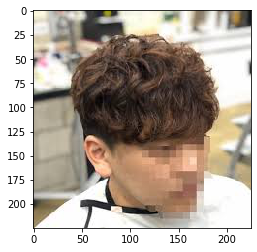

In [0]:
from PIL import Image

img = Image.open('./hairstyles/babyperm/google_베이비펌 picuki.com_0004.jpg')
print("original img shape : {}".format(np.array(img).shape))

# resize 
resized_img = np.array(img.resize((225,225))) # width, height
plt.imshow(resized_img)

In [0]:
for i in 